#9.49/9.490 Neural Circuits for Cognition

**PSET 1** - 

**Due September 27, 2022 by midnight** 


---

**NAME:**
Tarun Kamath
---
**Gmail**
tkamath2@gmail.com

----

Paste the link to your Colab here (make sure it is shared with rebeia@mit.edu):

https://colab.research.google.com/drive/1hijExeOfEGSZir-plYUT6alOb-kk0VKM?usp=sharing


----

Please submit a pdf version of your Colab with the cells containing the **solutions** visible in the document. See the 'Modules' section on Canvas for directions on how to get a good pdf copy.





---



---



---





---


# Problem 1: f-I curve for the leaky (LIF) integrate-and-fire neuron  (40 points)

A highly simplified description of neuron dynamics is given by the Leaky Integrate-and-Fire (LIF) model. The *subthreshold* neural voltage is given by:  

$$c_m \frac{d V}{dt} = - g_L (V- E_L)  + I_e \tag{1.1}$$


where $c_m$ is the membrane capacitance per unit area, $
g_L$ is a fixed (leak) conductance per unit area that maintains the cell at a resting potential $E_L$ in the absence of inputs, and $I_e$ is an injected current per unit area.

This equation is augmented by a threshold condition: when $V$ reaches a threshold $V_{\theta}$, the voltage is immediately reset to 
$V_{reset}<V_{\theta}$. At that point, the neuron is considered to have spiked.


---





---


##1.1

[10 points, analytical]

 Derive analytically the critical current ($I_{e}^*$) below which the neuron will never fire and above which it will as a function of the parameters $g_L, E_L$. Explain in words the dependence of $I_{e}^*$ on $g_L$, i.e.,  why does it vary the way it does?



---


Hint: What must be true of dV/dt to ensure that the neuron will reach its threshold? When does the neuron membrane potential becomes maximum?



---






---


ANSWER:

My answer is... 


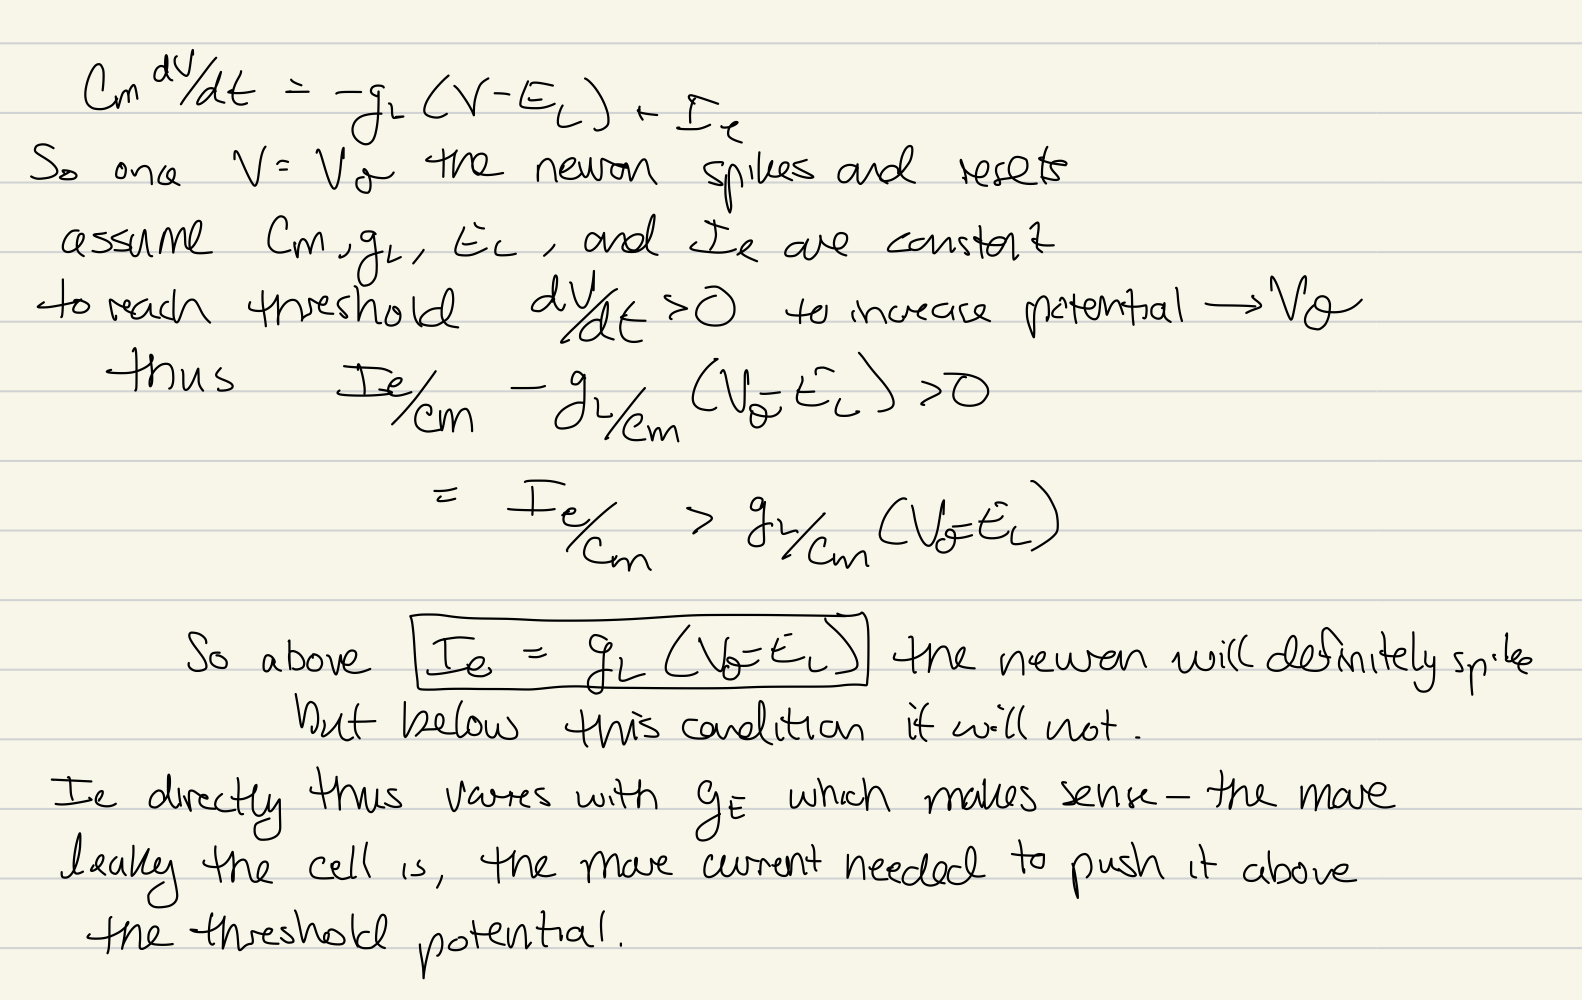


---






---


##1.2

[5 points, analytical] 

1.2.1 Derive analytically the the f-I curve of the neuron: that is, derive the relationship between $I_{e}$ and the firing rate $f$ of the LIF neuron. 

.


---



Hint: Solve for $V(t)$ at a constant $I_{e}$ and solve for how long it takes to go from $V=V_{reset}$ to $V_{\theta}$. Do this analytically (not numerically) using techniques from differential equations such as finding a change of variables or appropriate integrating factor.



---








---


ANSWER:

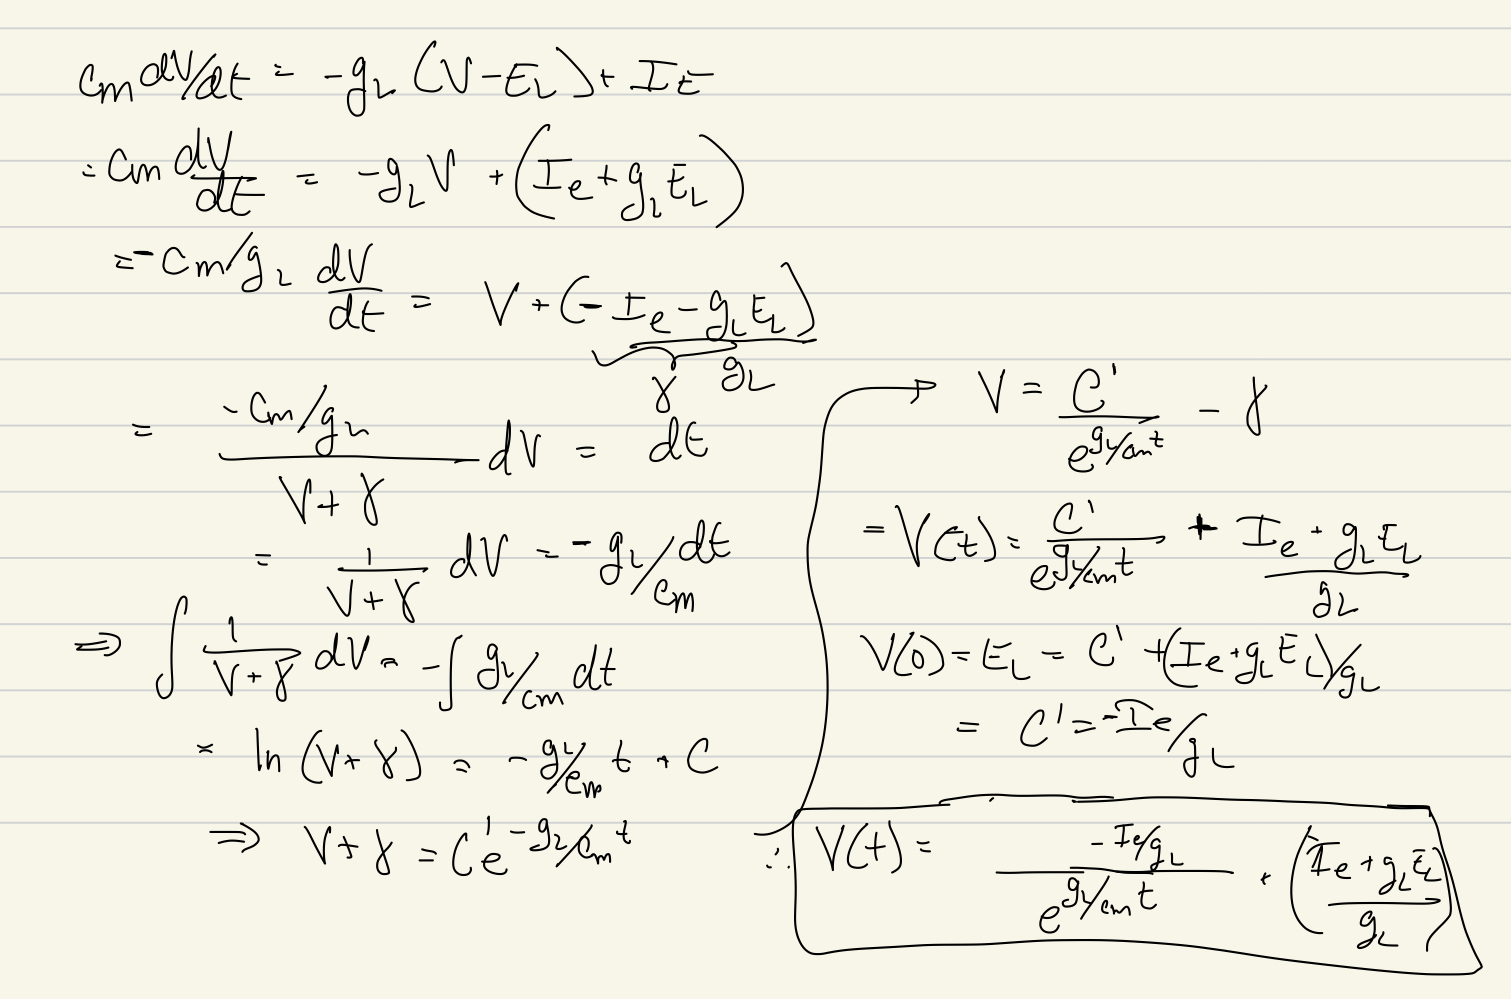


---




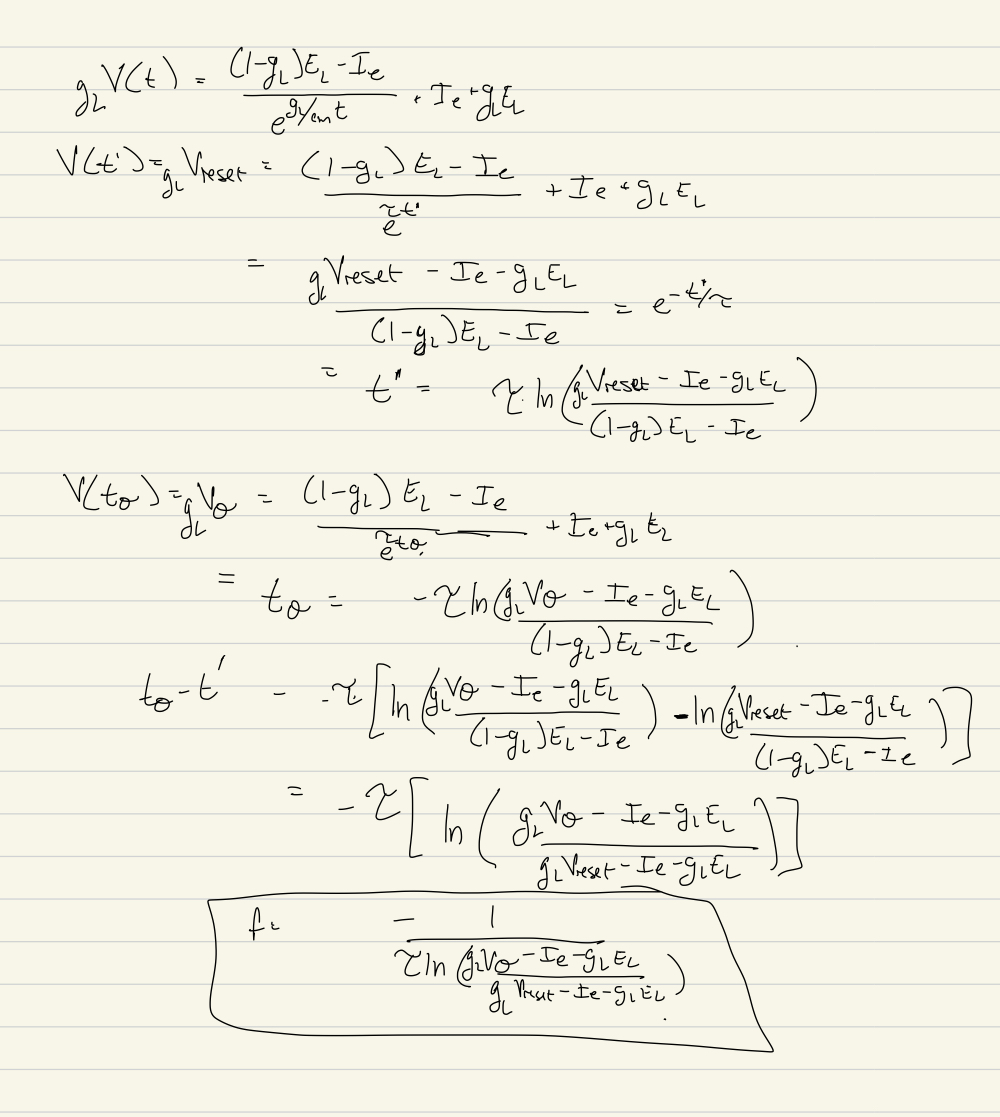



---


[5 points, numerical]

1.2.2: A correct derivation in for 1.2 should yield $$ f = \frac{1}{-\tau \log ( 1-\frac{V_\theta - V_{reset}}{E_L + I_e/g_L - V_{reset}})}\tag{1.2}$$

Plot $f$, the firing rate,  versus $I_{e}$, using parameters 
$E_L=-60$ mV, $g_L=0.1$ mS/cm$^2$, $c_m = 1$ $\mu$F/cm$^2$, $V_{\theta}=-50$ mV, $V_{reset}=-55$ mV.


---



In [89]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt

Vreset = -55      # mVolts
Vtheta = -50
EL = -60

cm = 1.0e-06               # Farad/cm^2
gL = 1.0e-04                # S/cm^2

tau = 1000*cm/gL                # msec
print('time constant tau (ms) = ',tau)

R = 1/gL

Istar = (Vtheta-EL)/R   # current in mAmp/cm^2

print('critical current = ',format(Istar,'.6f'))
Ie = np.linspace(0, 0.1, 15)
denominator_in_log = 1-(Vtheta-Vreset)/(EL + Ie*R - Vreset)
denominator = -tau * np.log(denominator_in_log)
f = np.power(denominator, -1)

time constant tau (ms) =  10.0
critical current =  0.001000


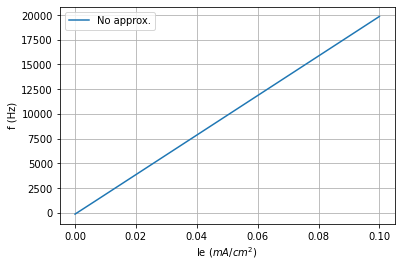

In [90]:
def plot_1_2(Ie, f):
  """Plot the computed firing rate (f)
  against the injected current (Ie).

  Parameters
  ----------
  Ie : np.ndarray
      Array of injected current values
  f : np.ndarray
      The firing rate at each injected current computed using the equation in 1.2
  """

  fig, ax = plt.subplots()
  ax.plot(Ie,f*1000, label='No approx.')
  ax.set_xlabel('Ie ($mA/cm^2$)')
  ax.set_ylabel('f (Hz)')
  #ax.set_ylim(0,100)                # uncomment to locate 60 Hz current needed
  #ax.set_xlim(0,0.0025)
  ax.legend()
  ax.grid()

plot_1_2(Ie, f)



---


##1.3

[5 points, analytical] 

1.3.1 Use the expansion $\log(1-x) \approx - x - x^2/2$ valid for small $x$  in your expression from 1.2 to show analytically that the f-I curve is approximately linear for large values of $I_e$ (Please show your work). 


---





---


ANSWER:

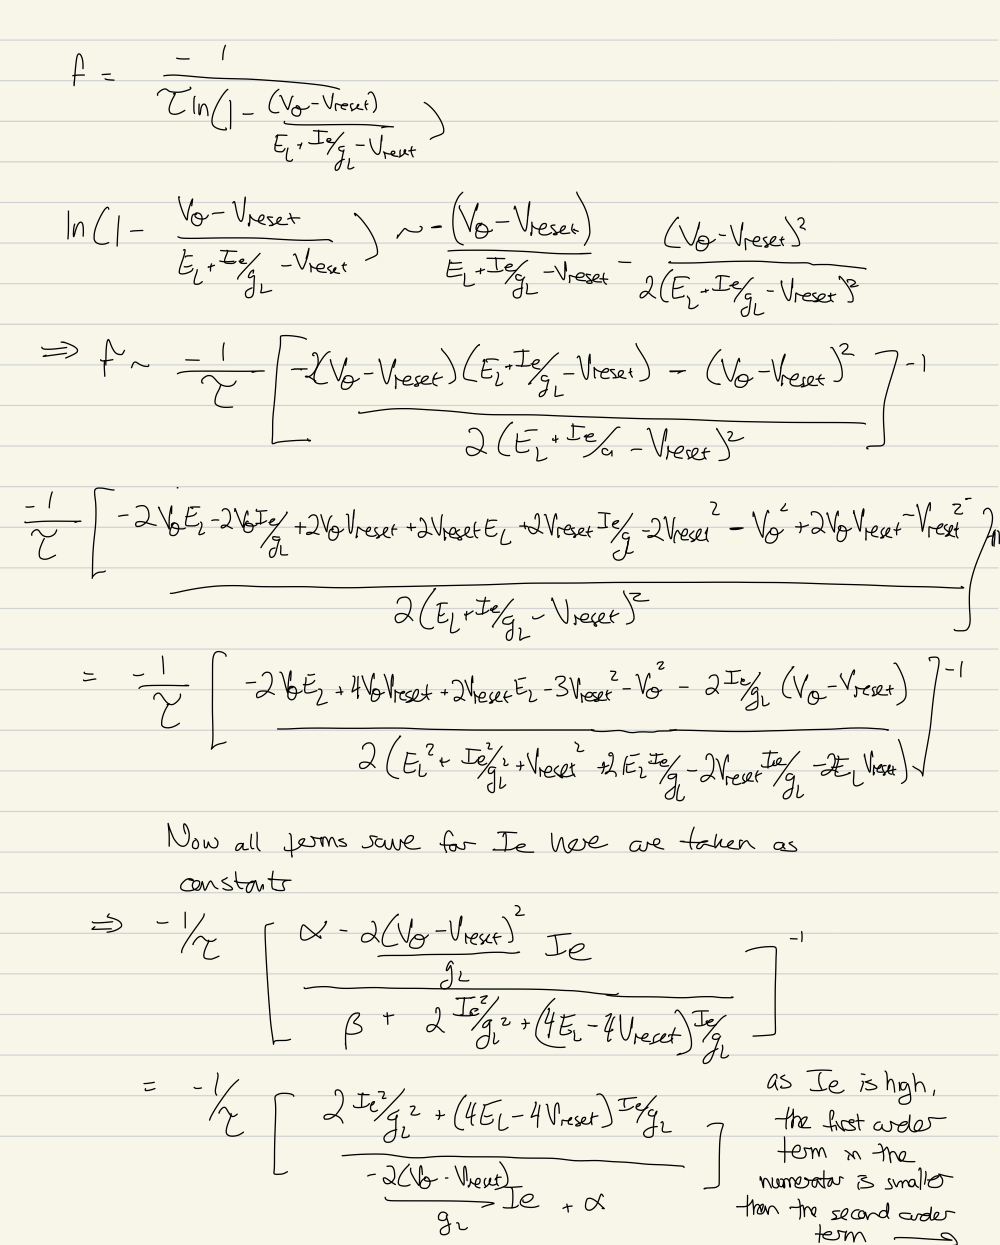
---




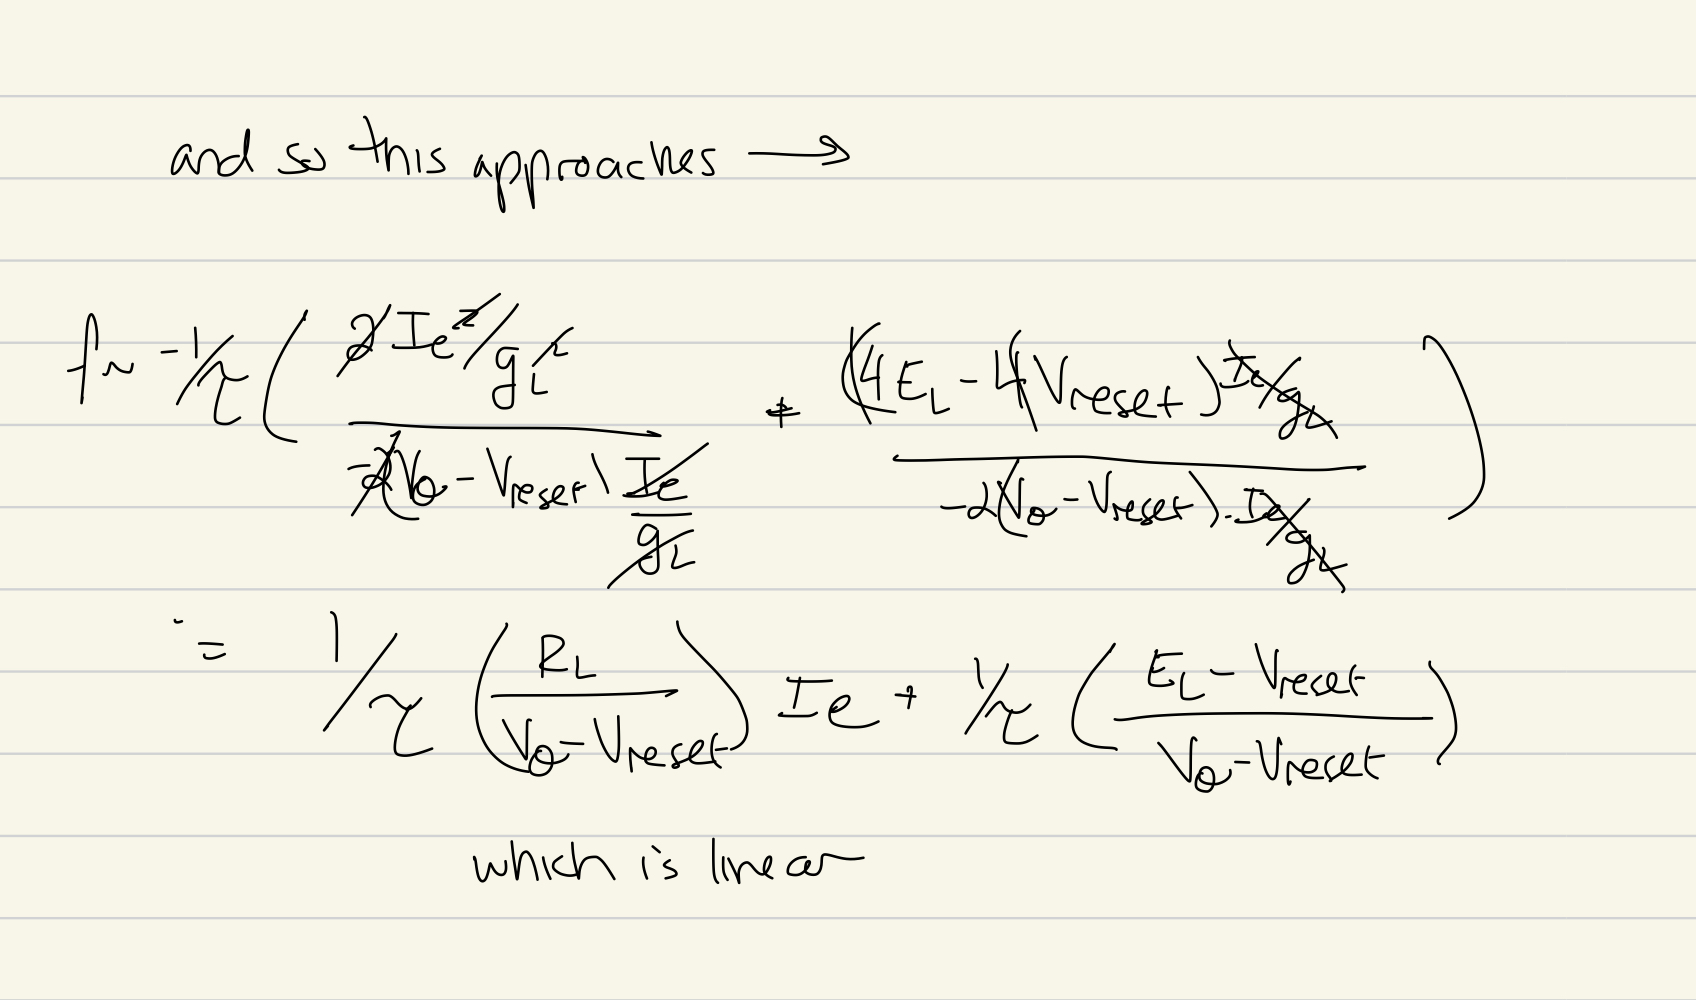



---


[5 points, numerical]

1.3.2 Correct steps for 1.3.1 will yield the following linear equation for firing rate f in the form $f=mx+b$

$$f = \left( \frac{1}{\tau} \frac{R_L}{V_\theta - V_{reset}} \right) I_e  + \frac{1}{\tau} \bigg(\frac{E_L - V_{\theta}}{V_\theta - V_{reset}} +\frac{1}{2}\bigg)$$


Add this approximate linear expression for the f-I curve to your plot in 1.2. This should confirm for which values of $I_e$ the linear aproximation is a good one.


---



In [91]:
#Ie = np.linspace(-10, 10, 15)
fapp = (R/(tau*(Vtheta-Vreset)))*Ie + (1/tau) * ((EL-Vtheta)/(Vtheta-Vreset) + 0.5)
#Ie, f (both can can be carried through from 1.2)

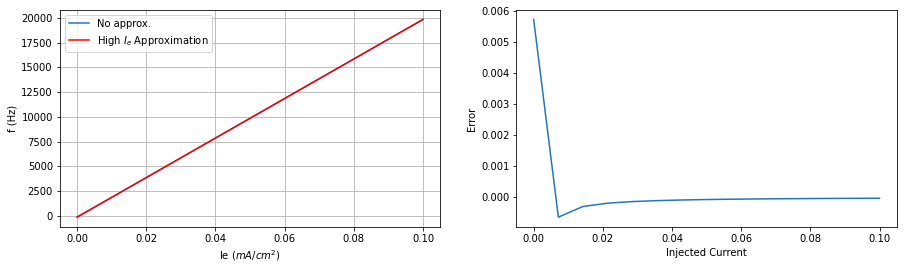

In [92]:
# plot the true expression and the approximation
def plot_1_3(Ie, f, fapp):
  """Plot the computed firing rate (f) and the linear approximation (fapp) 
  against the injected current (Ie).

  Parameters
  ----------
  Ie : np.ndarray
      Array of injected current values
  f : np.ndarray
      The firing rate at each injected current computed using the equation in 1.2
  fapp: np.ndarray
      The firing rate computed from the linear approximation found in 1.3
  """

  _, (firing_rate_plot, diff_plot) = plt.subplots(1, 2, figsize=(15, 4))
  firing_rate_plot.plot(Ie,f*1000, label='No approx.')
  firing_rate_plot.plot(Ie,fapp*1000,'r-', label='High $I_e$ Approximation')
  firing_rate_plot.set_xlabel('Ie ($mA/cm^2$)')
  firing_rate_plot.set_ylabel('f (Hz)')
  #ax.set_ylim(0,100)                # uncomment to locate 60 Hz current needed
  #ax.set_xlim(0,0.0025)

  diff_plot.plot(Ie, f - fapp)
  diff_plot.set_ylabel('Error')
  diff_plot.set_xlabel('Injected Current')
  firing_rate_plot.legend()
  firing_rate_plot.grid()

plot_1_3(Ie, f, fapp)



---


##1.4
# UNANSWERED QUESTION


[10 points, analytical] 

Instead of a piecewise constant currents $I_e$, assume that the current in Eq. 1.1 is due to short pulses of dendritic currents from neighboring cells. In general, the current provided by each pulse is not enough to make the cell spike. However, if the short pulses are close enough in time, their effect may add-up and that will allow the cell to reach the voltage threshold to spike. To simplify modeling this effect, we will assume that the frequency of current pulses, $f_s$ is constant. We also assume that each current current pulse has a constant magnitude $I_s$ (less than $I_e^*$). therefore, the current source is:

$$ I_e (t) = \nu \sum_s I_s \delta(t-t_s),$$

where $\nu$ is a constant that chracterizes the width of the pulse, which we will take to be much smaller than $\Delta t_s=t_{s+1} - t_s$, the time between two consecutive current pulses.

We assume that $I_s = a I_e^*$, with $a << 1$. 

.

Find the minimum $f_s$ that will allow the cell to spike, and show that in the limit of very small $\nu$, $f_s$ is independent of the time constant $\tau = \frac{c_m}{g_L}$ of the cell.



---


**Hint:** 

1. After you sum the geometric series and solve for $t_s$, you will end up with logarithmic expression. Use the linear approximation $\log ( 1 - x ) = - x$ valid for small $x$ to find $t_s$ as $\nu$ approaches zero.


2. Attached at the end of this document you will find the solutions for a similar question in 9.40 for 3 pulses. Your job is to extend this to an indefinite number of pulses, then use your knowledge of geometric series to derive an expression for $v$, solve this expression for $t_s$ and thereby $f_s$.


---





---


ANSWER:





---





---

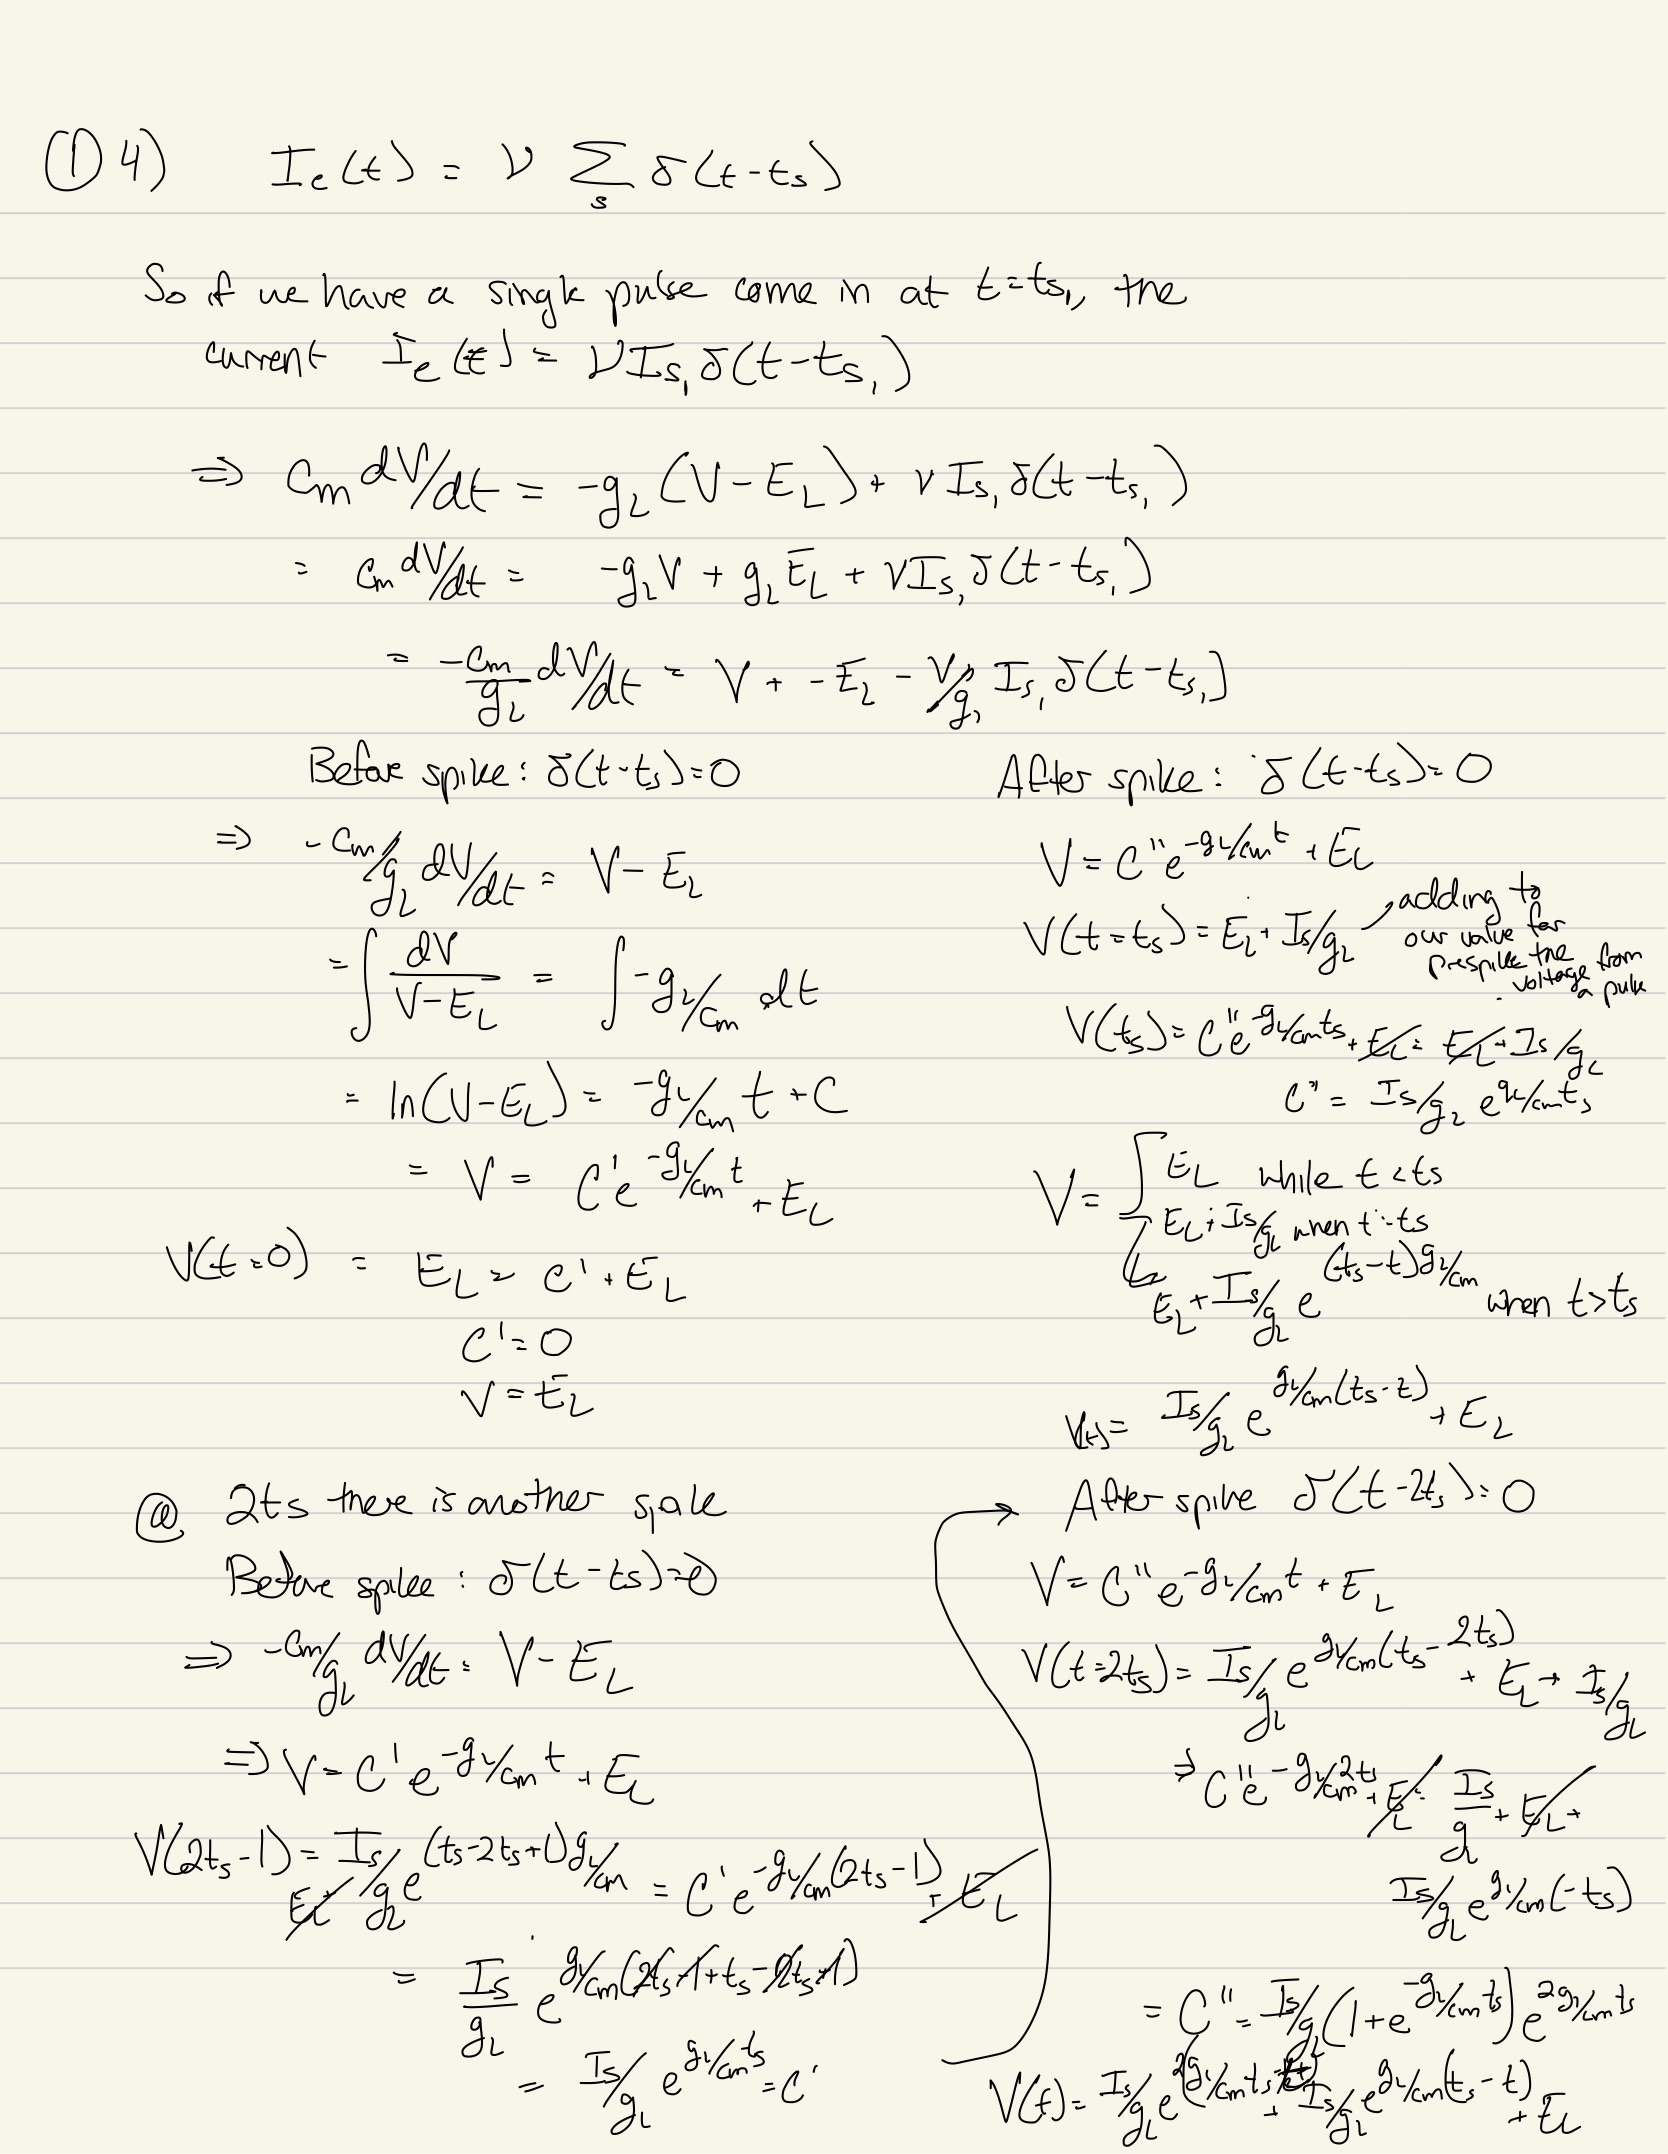

---



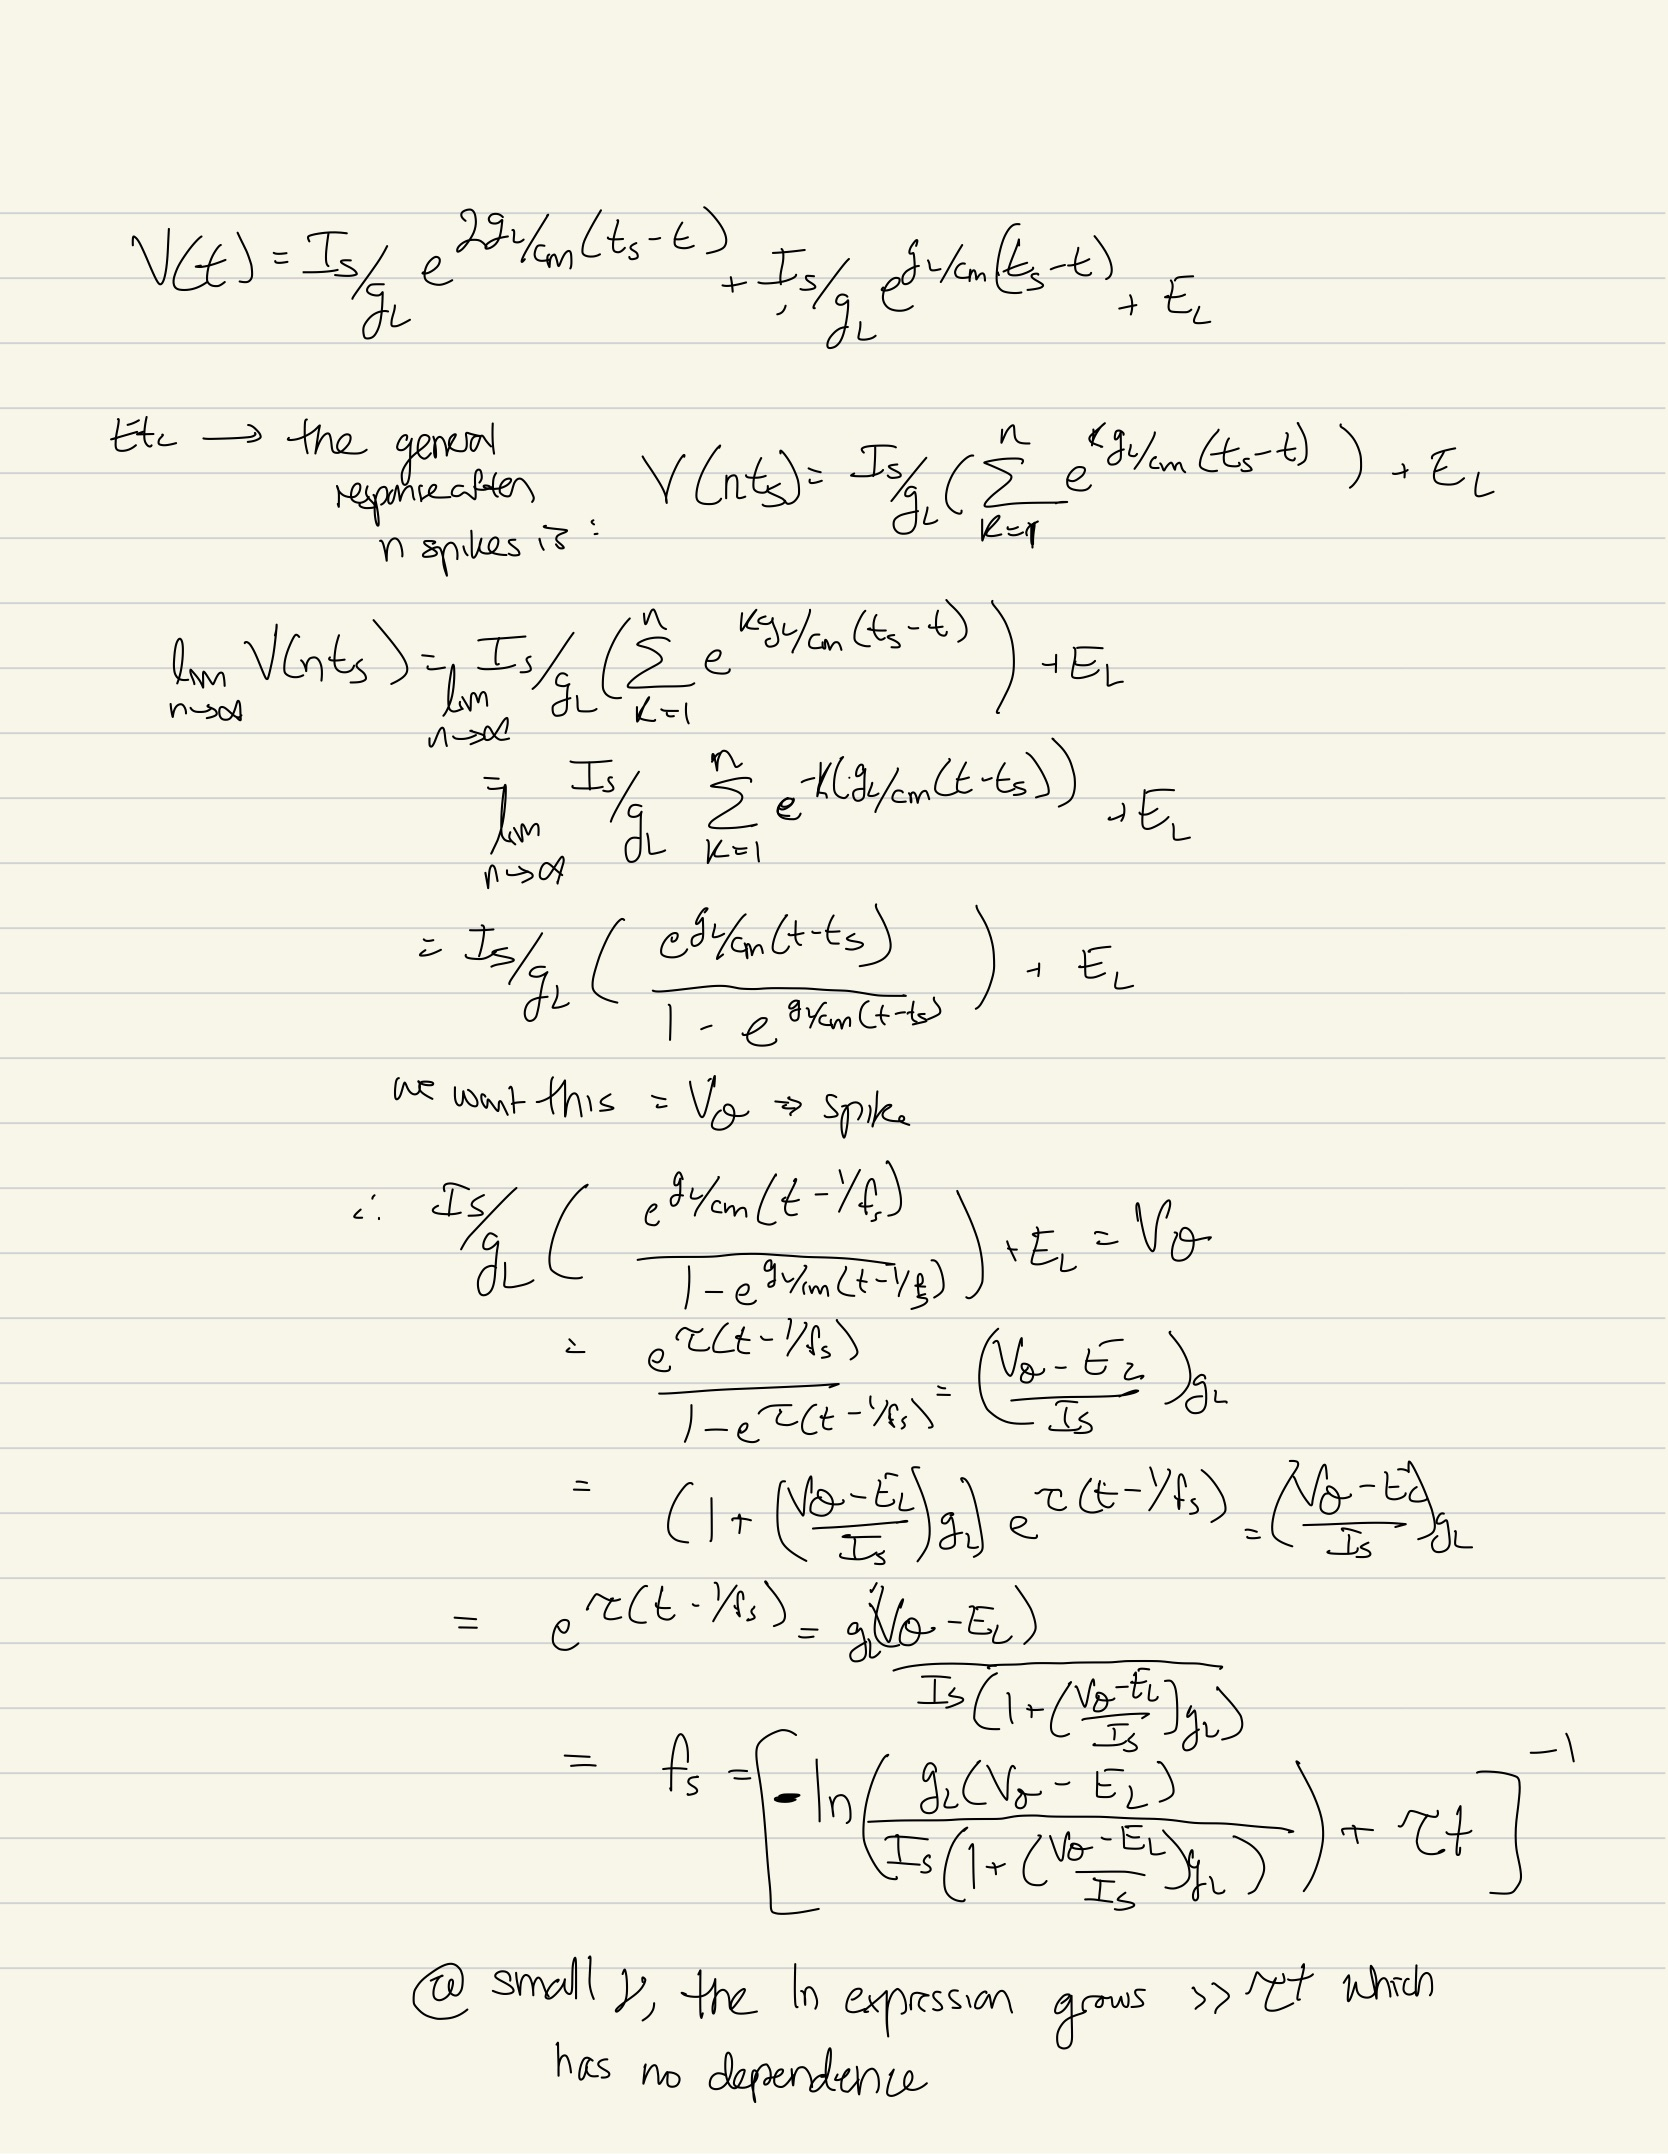



---


#Problem 2: Numerical simulation of LIF-based models of neurons and assessment of the method-of-averaging to obtain rate-based expressions (30 points).

Consider Equation 1 (and the reset condition) together with the following equation for synaptic activation:


$$
\tau_s \frac{ds}{dt} = -s + \sum_{a} \delta (t-t_a) \tag{2.1},
$$

where the sum over $a$ in the synaptic equation is over all the times $t_a$ at which the neuron spikes. 



---





---


##2.1

[5 points, numerical] 

2.1.1: Numerically integrate Equations (1.1 and 2.1) to obtain the time-evolution of the voltage and synaptic activation of a LIF neuron, over a 0.5 second interval. 

(To numerically integrate: replace the derivative by a finite-time difference over an interval $\Delta t$ according to the ``Euler method", as we saw in class, and iterate. Use $\Delta t = 0.1$ ms.) 

Use parameters from Problem 1:

 Initial conditions: $s(0) = 0$ and $V(0)=V_{reset}$. At $t= 500$ ms, step $I_{e}$ from 0 to a value larger than $I_e^*$ that produces spiking at approximately 60 $Hz$; hold this step until $t=1500$ ms, then return $I_{e}$ to 0. 


---





---


ANSWER:

Explicitly state the function value at (t+1) as a function of the value at (t) for both the LIF membrane voltage (1.1) and the synaptic activations (2.1).

$$V(t+1) = \frac{\Delta t}{c_{m}} (-g_{L}(V(t)-E_{L}) + I_{E}) + V(t)$$

$$s(t+1) = \frac{\Delta t}{\tau_{s}}(-s(t) + \sum_{a} \delta_{t,t_{spk,a}^{b}} ) + s(t)$$





---






---


[5 points, numerical]

2.1.2: Plot the simulated $V(t)$ and $s(t)$ versus time in $ms$, with $s(t)$ simulated under three conditions: $\tau_s = 10$ ms, $\tau_s=50$ ms, and $\tau_s=100$ ms.



---



In [117]:
import numpy as np
import matplotlib.pyplot as plt
import math


Vreset = -55      # mVolts
Vtheta = -50
EL = -60
cm =  1.0e-06               # Farad/cm^2
gL =  1.0e-04                # S/cm^2

tau = 1000*cm/gL                # msec


# add your code here to generate t, i, v, s_tau_10, s_tau_50, s_tau_100
t = np.linspace(0, 1.5,1501)
i = np.zeros(1501)
i[500:1500] = 0.00115
delta = 0
v = np.zeros(1501)
s_tau_10 = np.zeros(1501)
s_tau_50 = np.zeros(1501)
s_tau_100 = np.zeros(1501)
v[0] = Vreset

for k in range(1500):
    delta = 0
    v[k+1] = 0.001/cm * (-gL*(v[k]-EL)+i[k+1]) + v[k]
    if v[k+1] > Vtheta:
        delta = 1
        v[k+1] = Vreset
    s_tau_10[k+1] = 0.001/(0.01) * (-s_tau_10[k] + delta) + s_tau_10[k]
    s_tau_50[k+1] = 0.001/(0.05) * (-s_tau_50[k] + delta) + s_tau_50[k]
    s_tau_100[k+1] = 0.001/(0.1) * (-s_tau_100[k] + delta) + s_tau_100[k]


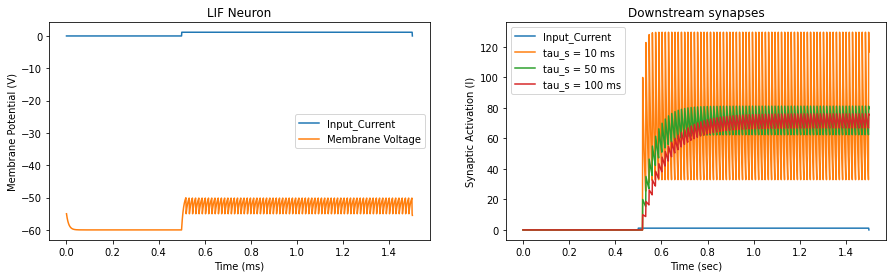

In [118]:
def plot_2_1(t, i, v, s_tau_10, s_tau_50, s_tau_100):
  """Plot the computed firing rate (f) and the linear approximation (fapp) 
  against the injected current (Ie).

  Parameters
  ----------
  t : np.ndarray
      Array of timepoints
  i : np.ndarray
      The injected current at each time point
  v : np.ndarray
      The membrane voltage at each time point
  s_tau_y : np.ndarraya
      The value of the downstream synaptic activation at each time point, 
      when simulated with a tau_s of "y"
  """
  fig, axs = plt.subplots(1, 2, figsize=(15, 4))
  (membrane_plot, synaptic_plot) = axs

  membrane_plot.plot(t, 1000*i, label='Input_Current')
  membrane_plot.plot(t, v, label='Membrane Voltage')
  membrane_plot.title.set_text('LIF Neuron')
  membrane_plot.set_ylabel('Membrane Potential (V)')
  membrane_plot.set_xlabel('Time (ms)')
  membrane_plot.legend()

  synaptic_plot.plot(t, 1000*i, label='Input_Current')
  synaptic_plot.plot(t, s_tau_10*1000, label='tau_s = 10 ms')
  synaptic_plot.plot(t, s_tau_50*1000, label='tau_s = 50 ms')
  synaptic_plot.plot(t, s_tau_100*1000, label='tau_s = 100 ms')
  synaptic_plot.set_ylabel('Synaptic Activation (I)')
  synaptic_plot.title.set_text('Downstream synapses')
  synaptic_plot.set_xlabel('Time (sec)')
  synaptic_plot.legend()
  return fig, axs

fig, axs = plot_2_1(t, i, v, s_tau_10, s_tau_50, s_tau_100)


# 

---


##2.2



 As in class, averaging over the fast spiking variable -- specifically over one inter-spike interval -- reduces this pair of equations to a single differential equation for $s$ in terms of the firing rate $\nu(I_{e})$ of the neuron as follows:
$$
\dot{s} = -\frac{s}{\tau_{s}}+\beta f(I_{inj})
$$
where in this case $\beta = \frac{1}{\tau_s}$


---



[5 points, numerical]
2.2.1 Show the rate-based equation results for $s(t)$ on top of $s(t)$ obtained from the spiking simulations in previous question.  

.




---


[5 points, conceptual]

2.2.2 For what value of $\tau$ does the rate-based model most closely approximate the synaptic current from the spiking simulations? How might changes in the firing rate affect this approximation?







---


ANSWER:

### This would be most true if the $\tau$ was much larger, say close to 100 ms. This is the case since at higher time constants, the membrane does not have as much time to relax back to a given state and so the $T_{isi}$ will be less than the relaxation time constant. Thus multiple spikes can happen before the membrane reaches steady state voltage once again, and thus it is better approximated as a firing rate rather than instantaneous firings, as there will be multiple intervals in which the firing rate >1. 




---



In [64]:
#Add code here to generate f_tau_10, f_tau_50, f_tau_100
f_tau_10 = (tau/100)*(1/(tau/100)*np.diff(s_tau_10, prepend = s_tau_10[0])/0.1 + s_tau_10/(tau/100))
f_tau_50 = (tau/20)*(1/(tau/20)*np.diff(s_tau_10, prepend = s_tau_10[0])/0.1 + s_tau_10/(tau/20))
f_tau_100 = (tau/10)*(1/(tau/10)*np.diff(s_tau_10, prepend = s_tau_10[0])/0.1 + s_tau_10/(tau/10))


(<Figure size 1080x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'LIF neuron from 0.4s-1s'}, xlabel='Time (ms)', ylabel='Membrane Potential (V)'>,
        <AxesSubplot:title={'center':'Downstream synapses from 0.4s-1s'}, xlabel='Time (sec)', ylabel='Synaptic Activation (I)'>],
       dtype=object))

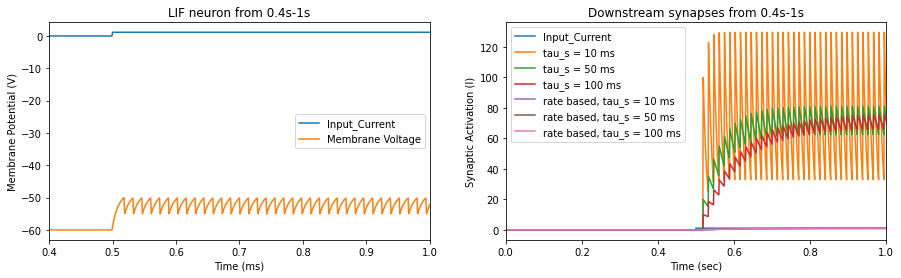

In [119]:
def plot_2_2(axs, t, f_tau_10, f_tau_50, f_tau_100):
  """Plot the computed firing rate (f) and the linear approximation (fapp) 
  against the injected current (Ie).

  Parameters
  ----------
  axs : np.ndarray
      matplotlib axs with two subplots (here generated from plot_2_1)
  t : np.ndarray
      Array of timepoints
  f_tau_y : np.ndarray
      The value of the rate based approximation of the downstream synaptic 
      input s(t) when simulated with a tau_s of "y"
  """

  (membrane_plot, synaptic_plot) = axs
  membrane_plot.title.set_text('LIF neuron from 0.4s-1s')
  membrane_plot.set_xlim(0.4, 1)

  synaptic_plot.plot(t, f_tau_10, label='rate based, tau_s = 10 ms')
  synaptic_plot.plot(t, f_tau_50, label='rate based, tau_s = 50 ms')
  synaptic_plot.plot(t, f_tau_100, label='rate based, tau_s = 100 ms')
  synaptic_plot.set_ylabel('Synaptic Activation (I)')
  synaptic_plot.title.set_text('Downstream synapses from 0.4s-1s')
  synaptic_plot.set_xlim(0, 1)
  synaptic_plot.set_xlabel('Time (sec)')
  synaptic_plot.legend()
  return fig, axs

fig, axs = plot_2_1(t, i, v, s_tau_10, s_tau_50, s_tau_100)
plot_2_2(axs, t, f_tau_10, f_tau_50, f_tau_100)



---


##2.3

[10 points, numerical] 

The drawback of the simple LIF model is that it 
cannot account for the variety of electrophysiological behaviors of real neurons. For this reason, we consider next an extension of the LIF model by adding non-linear terms and a feedback term from ionic currents:

$$
c_m \frac{d V}{dt} = - g_L(V-E_L) + g_L \nu_\theta \exp\left(- \frac{(V_\theta - V)}{\nu_\theta} \right) - s + I
$$
$$
\tau_s \frac{d s}{dt} = - s + a (V- E_L)
$$
This model reduces to the LIF model in the limit of $\nu_\theta = 0$. The exponential term, representative of the sodium channel, diverges for high values of the membrane potential which represents the onset of a spike. This divergence is artificially removed by resetting the potential to $V_{reset}$ when it reaches values, $V_s$, typical of values attained by the potential (above the threshold) when the neuron spikes. In addition to resetting the potential to $V_{reset}$, the current is also made to jump by an amount $b$ after each spike:
$$ s ⟼ s+ b$$
This jump in $s$ tries to capture spike-triggered adaptation of ionic currents due, e.g., to slow deactivation of potassium channels after a spike. The coupling between $s$ and $V$ can be due to axial currents travelling to the soma.

We are going to numerically analyze this sytem for two sets of parameters. In both cases a and b:

  * calculate the voltage as a function of time (Numerically means use Euler)
  * calculate the current s as a function of time (Numerically means use Euler)

* find the distribution of spikes: average spiking rate, and a histogram of inter-spike intervals. Note the adaptation and variability of spike trains.



---



In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Fill in the blanks to make the following function work

import numpy as np
import matplotlib.pyplot as plt
import math

def exp_LIF(C,GL,EL,Vtheta,Vreset,nuTheta,taus, Vtop,a,b,Ie_step,dt,tot_Time,t_on,t_off):
  
  time = np.arange(0,tot_Time,dt)
  N = time.size
  Ie = np.zeros(N)
  Ie[np.logical_and(time > t_on, time <= t_off)] = Ie_step    
  
  V = np.zeros(N)
  s = np.zeros(N)
  V[0] =  EL 
  s[0]= 0   #a*(V[0] - EL)

  for n in range(0,N-1):
    V[n+1]= dt/C*(-GL*(V[n]-EL) + GL*nuTheta*np.exp(-(Vtheta-V[n])/nuTheta) - s[n] + Ie[n]) + V[n]
    s[n+1] = dt/taus * (-s[n] + a*(V[n]-EL)) + s[n]
    #Reset condition
    if V[n+1]>Vtop:
      V[n+1] = Vreset
      s[n+1] = s[n+1] + b

  #print(V[0]*1000)
  spikes = np.where(V == Vreset)[0]
  print('spikes at :',spikes)
  spikes = spikes -1
  V[spikes] = 0.020

  # spiking rate
  sp_rate = spikes.size/(t_off-t_on)      # Hz
  print('spike rate = ',sp_rate)

  time_diff = 1000*dt*np.diff(spikes)    # ms
  print('adaptation :', time_diff)
  print('average ISI = ',np.mean(time_diff))
  print('standard deviation ISI =',np.std(time_diff))
  plt.hist(time_diff)

  fig, ax = plt.subplots(2,1)
  ax[0].plot(time*1000, V*1000)
  ax[1].plot(time*1000,s*1e+09)
  """
  ax[0].set_xlim(0,0.100)
  ax[0].set_ylim(-80,25)
  #ax[1].set_ylim(0.,0.4)
  ax[1].set_xlim(0,0.100)
  """
  plt.tight_layout()
  plt.show()



### a.) adaptation part

Vtop  (mV) =  -40.4
spikes at : [ 3175  4528  6105  7958 10140]
spike rate =  50.00000000000001
adaptation : [13.53 15.77 18.53 21.82]
average ISI =  17.4125
standard deviation ISI = 3.100261077715875


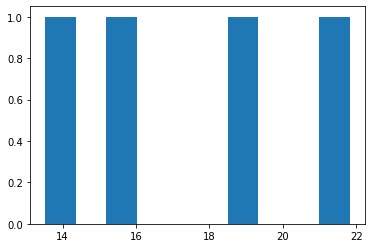

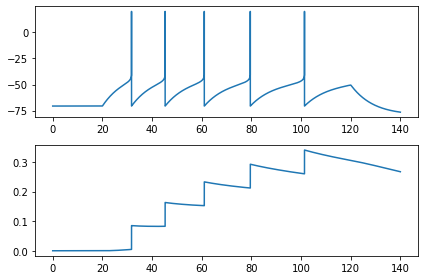

In [109]:
C= 281*1e-12                     #pF
GL=30*1e-9                             #nS
EL=-70.6*1e-03                        #mV
Vtheta=-50.4*1e-03                    #mV
Vreset = -70.59*1e-03      #-47.0*1e-03               # -48.0          #mV
nuTheta = 2*1e-03                       #mV 2
taus = 144*1e-03                         #40*ms
a= 4.0*1e-09                         #nS 4
b= 0.0805*1e-09    #0.5                          #0.08   #nA

Vtop = Vtheta + 5*nuTheta
print('Vtop  (mV) = ',Vtop*1000)


# time parameters
tot_Time = 0.140
t_on = 0.020
t_off = 0.120
dt = 0.01*1e-03                # ms

Ie_step = 1e-09    #0.8*1e-09

exp_LIF(C,GL,EL,Vtheta,Vreset,nuTheta,taus, Vtop,a,b,Ie_step,dt,tot_Time,t_on,t_off)



### b.) chaotic part

Vtop  (mV) =  -40.4
spikes at : [ 3802  4089  4451  4952  5836  9078  9698 11212 12900 14244 16491 17369
 20602 21224 22746 24414 25789 27916 28855]
spike rate =  67.85714285714286
adaptation : [ 2.87  3.62  5.01  8.84 32.42  6.2  15.14 16.88 13.44 22.47  8.78 32.33
  6.22 15.22 16.68 13.75 21.27  9.39]
average ISI =  13.918333333333335
standard deviation ISI = 8.587251047661036


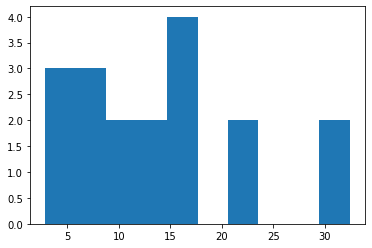

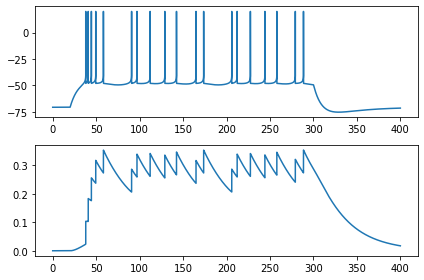

In [110]:
C= 281*1e-12                     #pF
GL=30*1e-9                             #nS
EL=-70.6*1e-03                        #mV
Vtheta=-50.4*1e-03                    #mV
Vreset = -48*1e-03      #-47.0*1e-03               # -48.0          #mV
nuTheta = 2*1e-03                       #mV 2
taus = 40*1e-03                         #40*ms
a= 4.0*1e-09                         #nS 4
b= 0.080*1e-09    #0.5                          #0.08   #nA
#Ie= 0.8*1e-09               #nA

Vtop = Vtheta + 5*nuTheta
#Vtop = 20               # mV

print('Vtop  (mV) = ',Vtop*1000)


dt = 0.01*1e-03                # ms
tot_Time = 0.400
t_on = 0.020     # sec
t_off = 0.300    # sec
time_interval = t_off - t_on    # sec
Ie_step = 0.80*1e-09       # Amp

exp_LIF(C,GL,EL,Vtheta,Vreset,nuTheta,taus, Vtop,a,b,Ie_step,dt,tot_Time,t_on,t_off)



---



---





---


# Problem 3: Single neuron with two time scales (30 points)



Consider a single neuron with two self-synapses, one excitatory and one inhibitory, with different characteristic time scales. The rate of the neuron is
given by:

  $$r\ =\ \alpha ( s_{1} \ -\ s_{2} \ ), \ \ \alpha  >0 \tag{3.1}$$



and the synaptic activities:


$$\tau_1\dot{s}_{1} = -s_1 + r \tag{3.2}$$

$$\tau_2\dot{s}_{2} = -s_2 + r \tag{3.3}$$



Here $\displaystyle \tau _{1} \  >\ 0$, $\displaystyle \tau _{2} \  >\ 0$ are the characteristic time scales.



---




##3.1

[5 points, analytical]

Write the system dynamics in a two dimensional matrix form, $\dot{s} = As$.

Use sympy (Python package) (and/or hand calculations as necessary) to show that the eigenvalues of the matrix $A$ as a function of $\alpha,   \tau_1, \tau_2$ have the form
$$\lambda_{1,2} = -\frac{1}{2} \left( \frac{1-\alpha}{\tau_1} + \frac{1+\alpha}{\tau_2} \right) \pm \sqrt{\frac{1}{4}\left( \frac{1-\alpha}{\tau_1} + \frac{1+\alpha}{\tau_2} \right)^2 - \frac{\alpha^2 + (1-\alpha)^2}{\tau_1 \tau_2}}. $$





---


ANSWER:

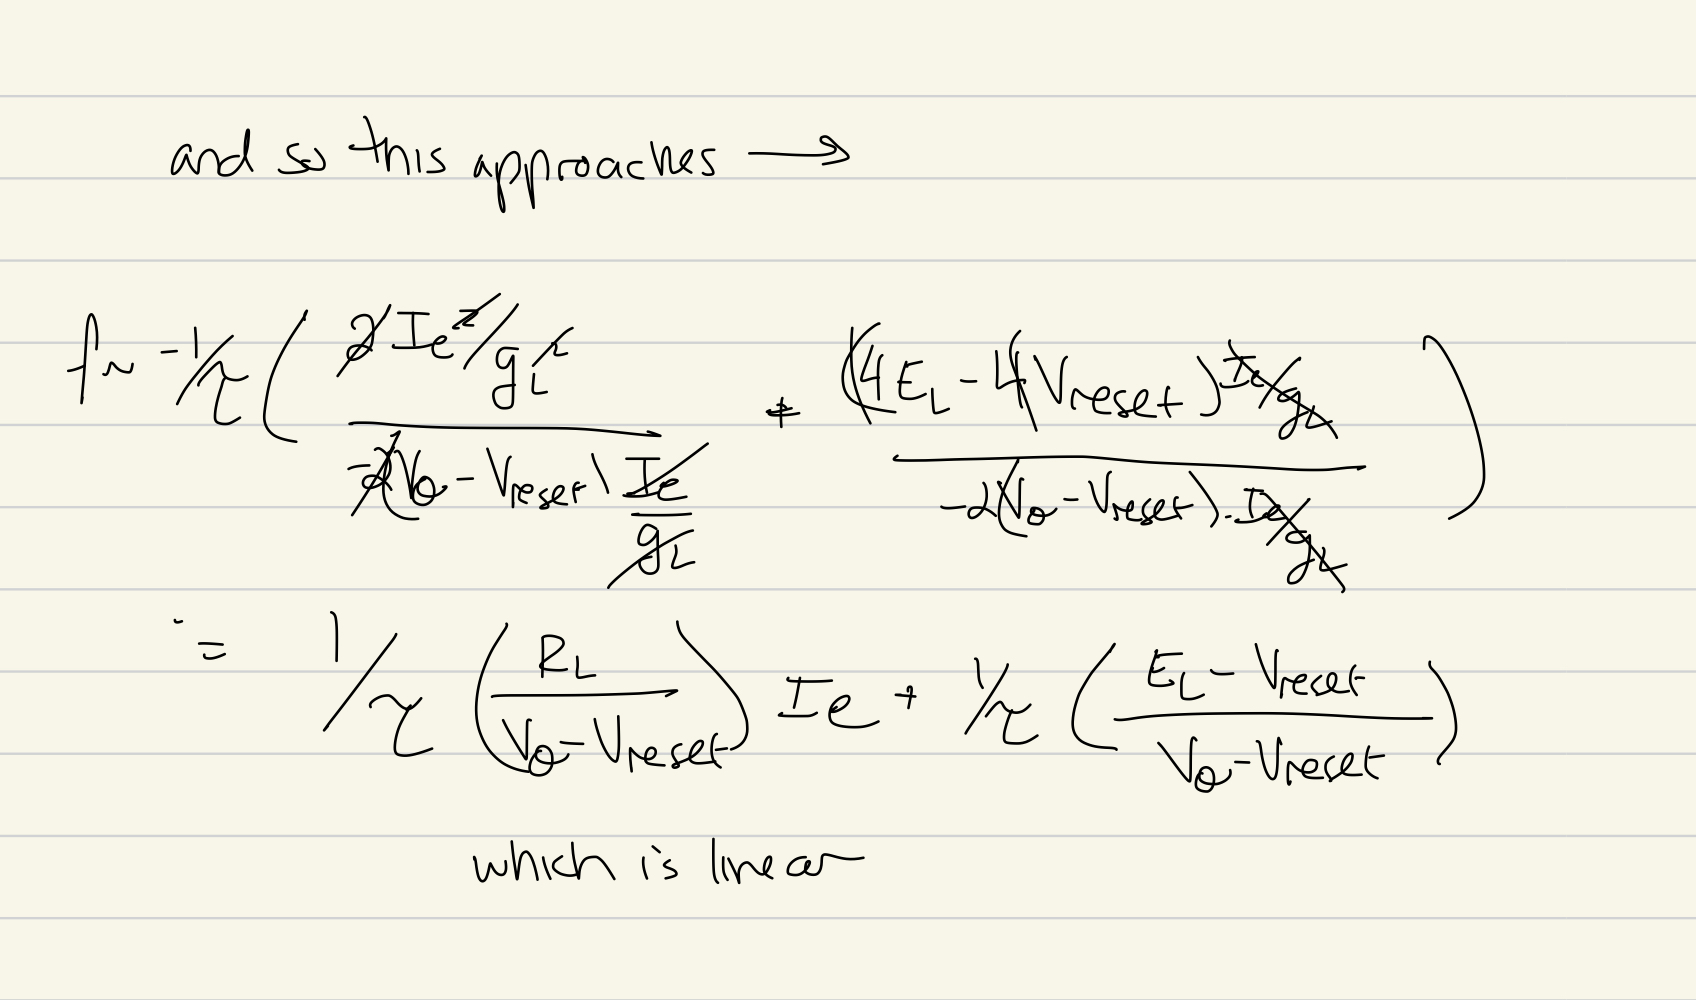


---






---


##3.2

[5 points, analytical]

 Analytically derive the possible fixed point(s) of the system.



---


Hint: What will $\dot{s}$ be if the system is at a fixed point? (No dynamics at fixed points). Is $A$ singular?


---



ANSWER:

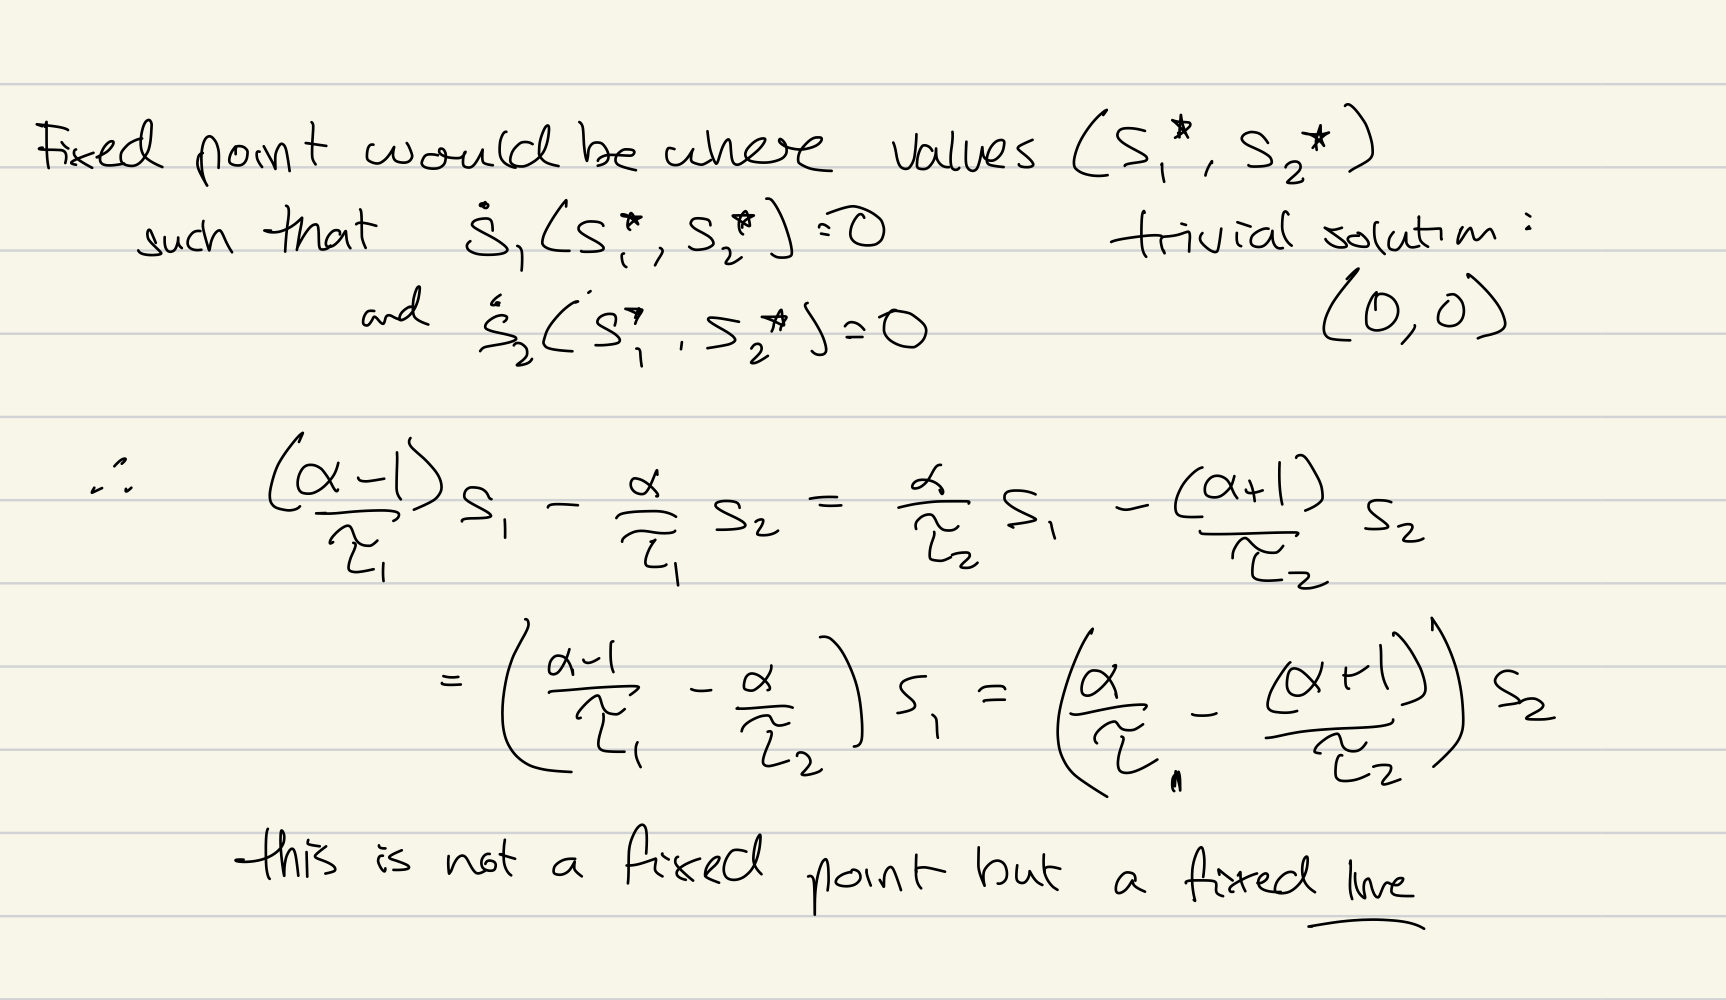



##3.3

[3 points, analytical]

3.3.1: For $\alpha = 1$, what will be the nature of the dynamics (exponential decay/growth, oscillations...) in case of 

a. $\tau_1 > \tau_2$?

b. $\tau_2 > \tau_1$?

Give an intuitive explanation for the difference between these 2 cases.

Hint: What do the eigenvalues tell us about the behavior of the system?




---


ANSWER:


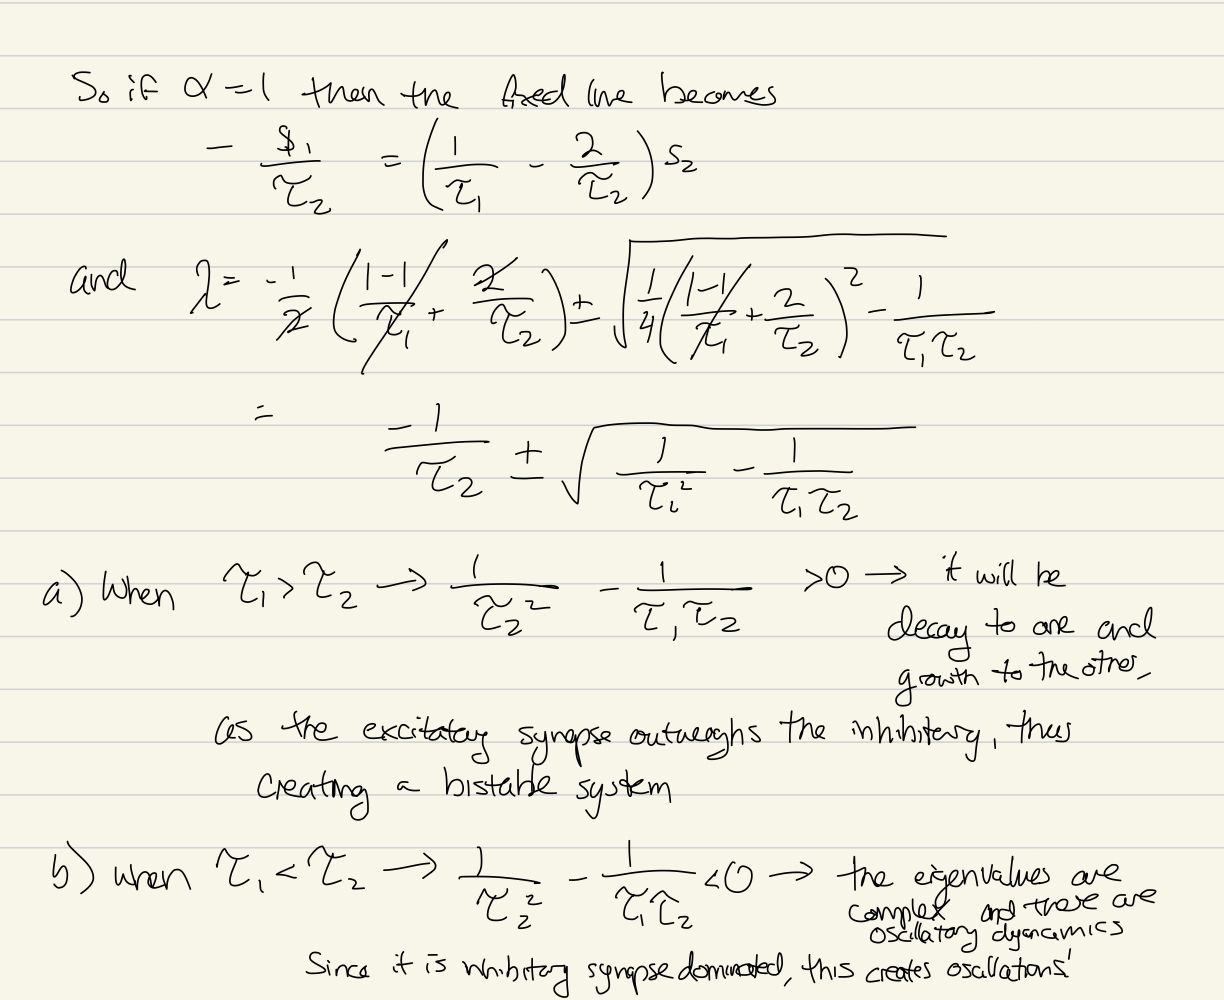



---






---


[2 points, numerical]

3.3.2: Draw qualitatively (by hand or using a computer) a representative solution trajectory in the $(s_1- s_2)$ plane for each of the cases.



---



In [12]:
# trajectories in the s1-s2 plane in both cases:
#Fill in the blanks to generate A

import numpy as np
import matplotlib.pyplot as plt
import random
import cmath

# case 1: tau1 > tau2

tau1 = 20
tau2 = 10
A_1 = [[0, -1/20],[1/10, -2/10]]


# case 2: tau2 > tau1
tau1 = 1
tau2 = 2
A_2 = [[0, -1],[1/2, -1]]


Eigenvalues: [-0.02928932 -0.17071068]
Eigenvalues: [-0.5+0.5j -0.5-0.5j]


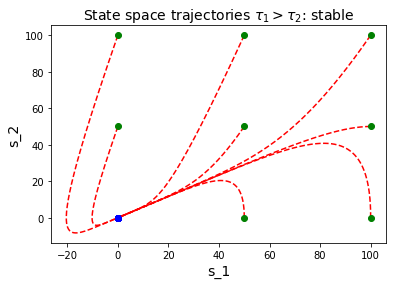

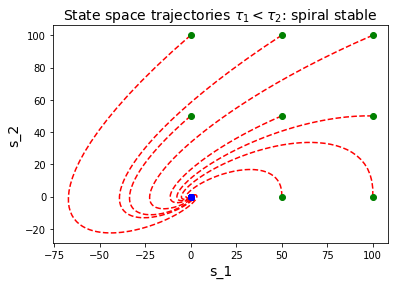

In [13]:
#Run this block to generate the plots

# Simulation parameters
dt = .1
T = 1000

def simulate(v_1_init, v_2_init, M, T_without_input=0):
  """Simulate model system.

  Args:
    v_1_init: Initial firing rate of neuron 1.
    v_2_init: Initial firing rate of neuron 2.
    T_without_input: Duration to simulate after turning off the input.
  
  Returns:
    V: [num_timesteps, 2] array of firing rates for the neurons
  """
  N = int(T / dt)
  N_without_input = int(T_without_input / dt)
  V = np.array([[v_1_init, v_2_init]]) * np.ones((N + N_without_input, 2))
  for i in range(N + N_without_input - 1):
    if i < N:
      dVdt = (np.dot(M, V[i]))
    else:
      dVdt = (np.dot(M, V[i]))
    V[i + 1] = dt * dVdt + V[i]
  return V


def plot_3_3(A, case = 'a'):
  print(f'Eigenvalues: {np.linalg.eig(A)[0]}')
  plt.figure()
  plt.xlabel('s_1', fontsize=14)
  plt.ylabel('s_2', fontsize=14);
  plt.title (f'State space trajectories {case}', fontsize=14)

  # Plot the state space trajectories for a grid of initial points
  for v_1_init in np.linspace(0, 100, 3):
    for v_2_init in np.linspace(0, 100, 3):
      V = simulate(v_1_init, v_2_init, A)
      plt.plot(V[:, 0], V[:, 1], 'r--')
      plt.plot(V[0, 0], V[0, 1], 'go')
      plt.plot(V[-1, 0], V[-1, 1], 'bo')



str_title_1 =r"$\tau_1 > \tau_2$: stable"
plot_3_3(A_1, case = str_title_1)

str_title_2 =r"$\tau_1 < \tau_2$: spiral stable"
plot_3_3(A_2, case = str_title_2)




---


##3.4

[5 points, analytical]


For $\alpha \ \gg \ 1$, what is the condition on $\tau_1, \tau_2$ for the system to be stable?



---



Hint: What must be true about the eigenvalues for the system to be stable?
        


---






---


ANSWER:


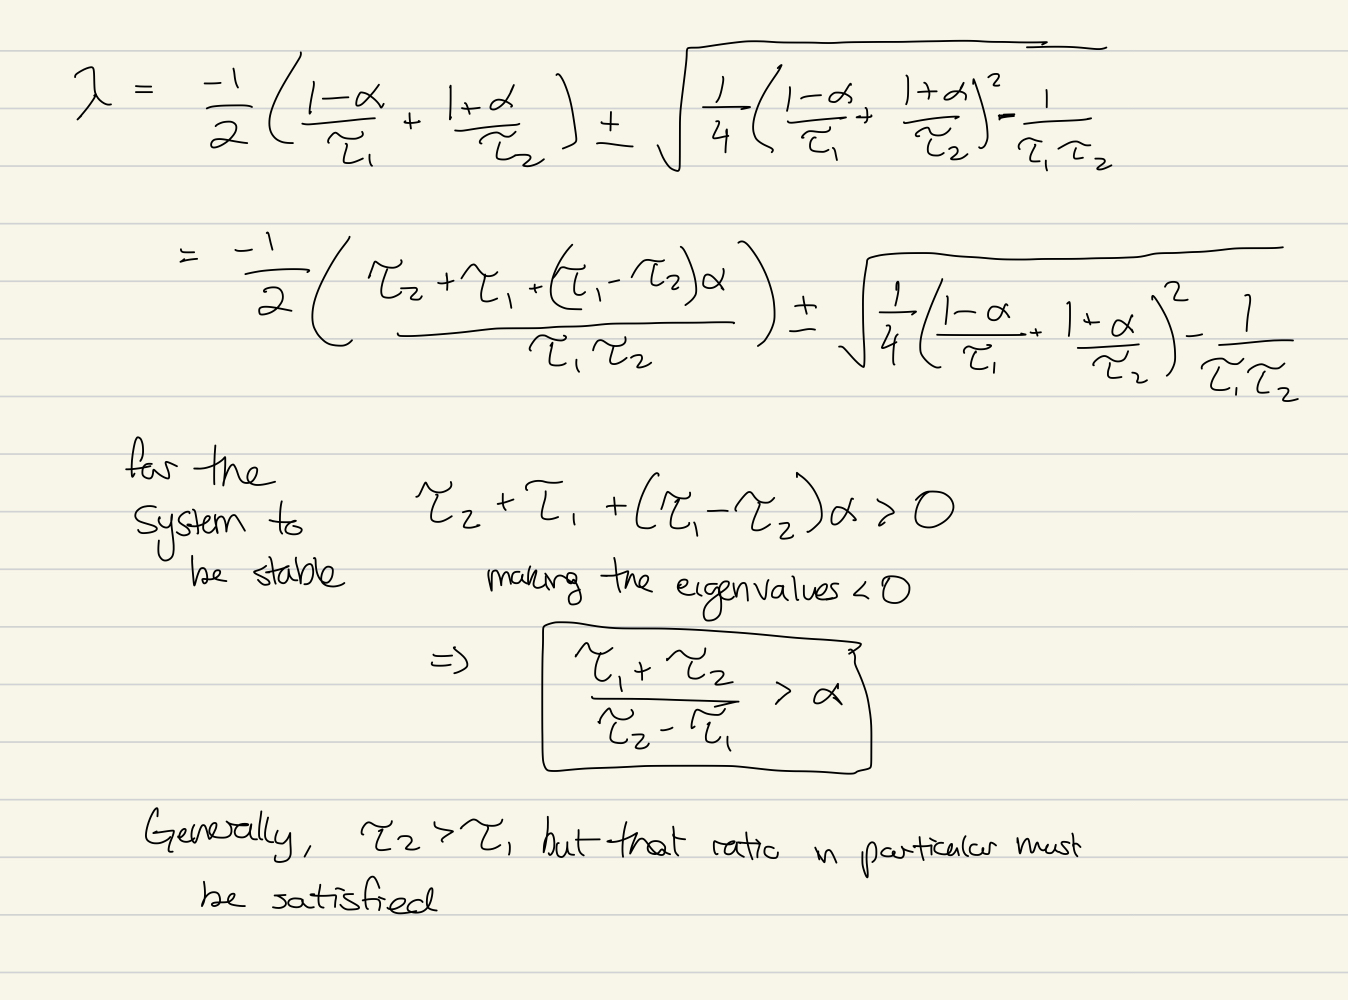

---







---


##3.5

[5 points, analytical] 

Now, assume that the synaptic activities have different amplitudes in the rate equation:
       
$$r\ =\ \alpha_{1} s_{1} \ - \ \alpha_{2} s_{2} ,\ \alpha_{1} ,\alpha_{2} \  >\ 0$$
    

What is the condition on $\alpha_1$, $\alpha_2$ in order for the system to have a continuum of fixed points?

Write an equation ($s_1$ as a function of $s_2$) describing the continuum of fixed points when the condition you found is realized, and draw it qualitatively.



---



**Hint:** To have a continuum of fixed points, one of the eigenvalues must be zero which implies that the matrix is singular.



---



ANSWER:

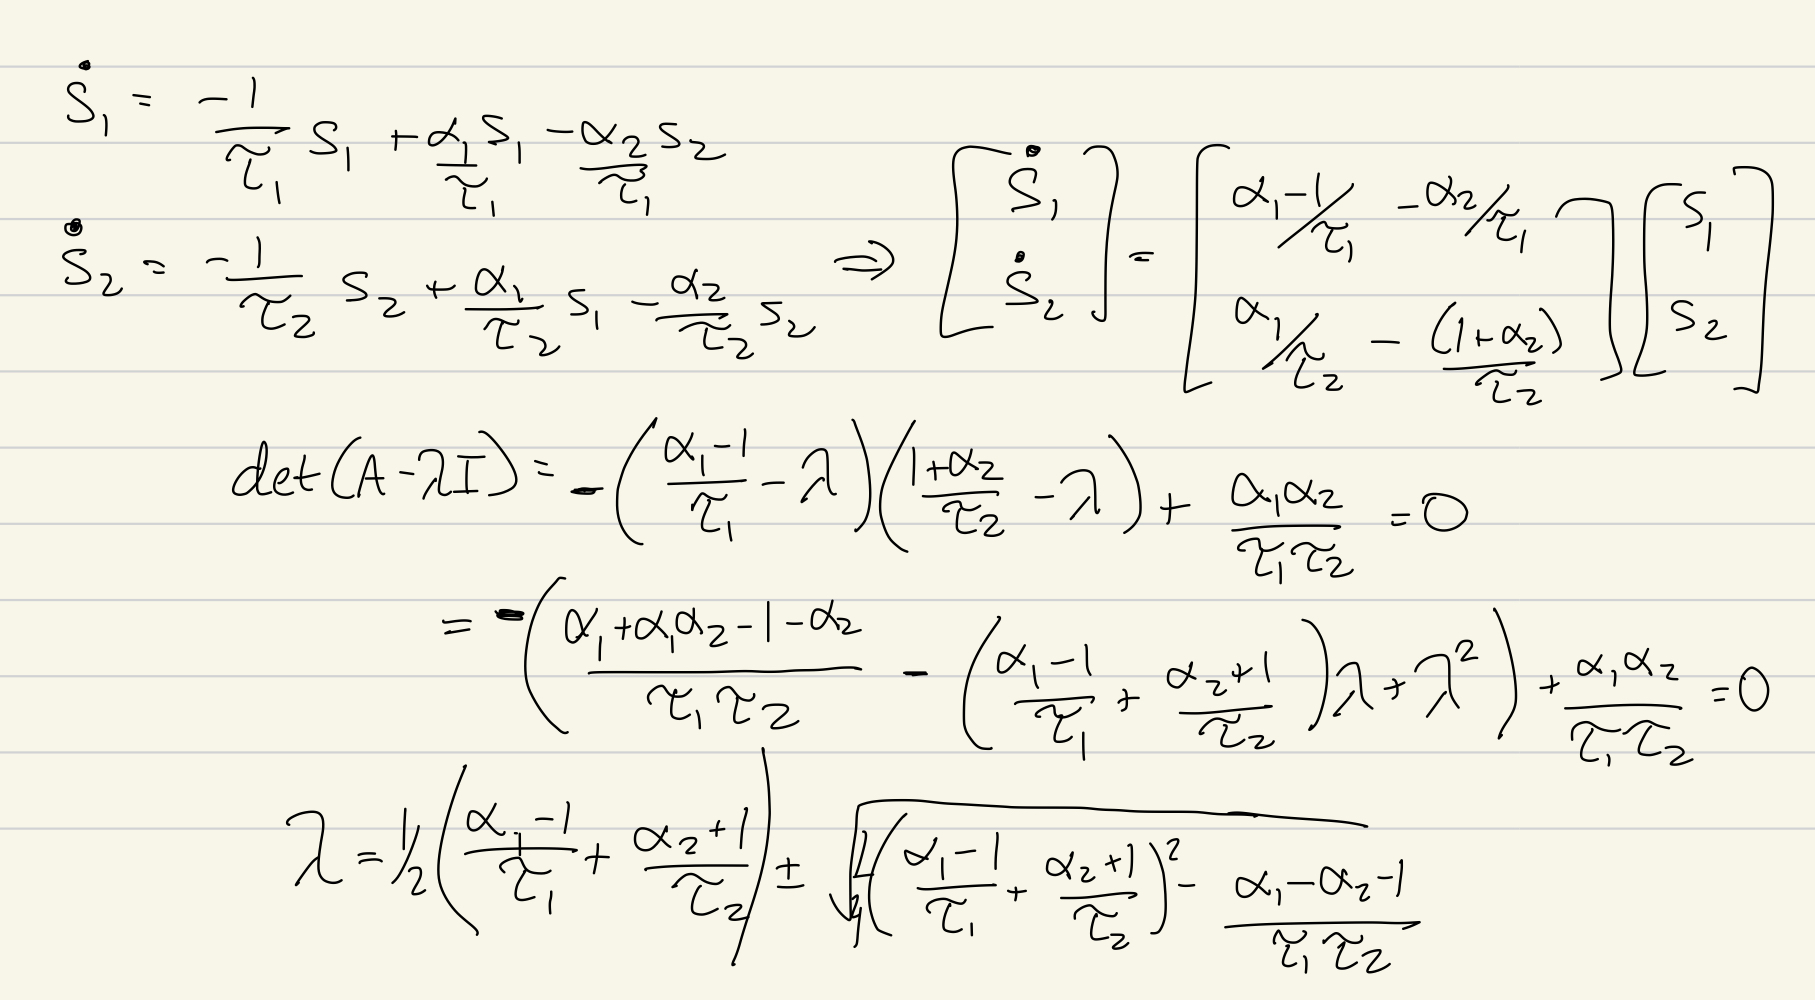



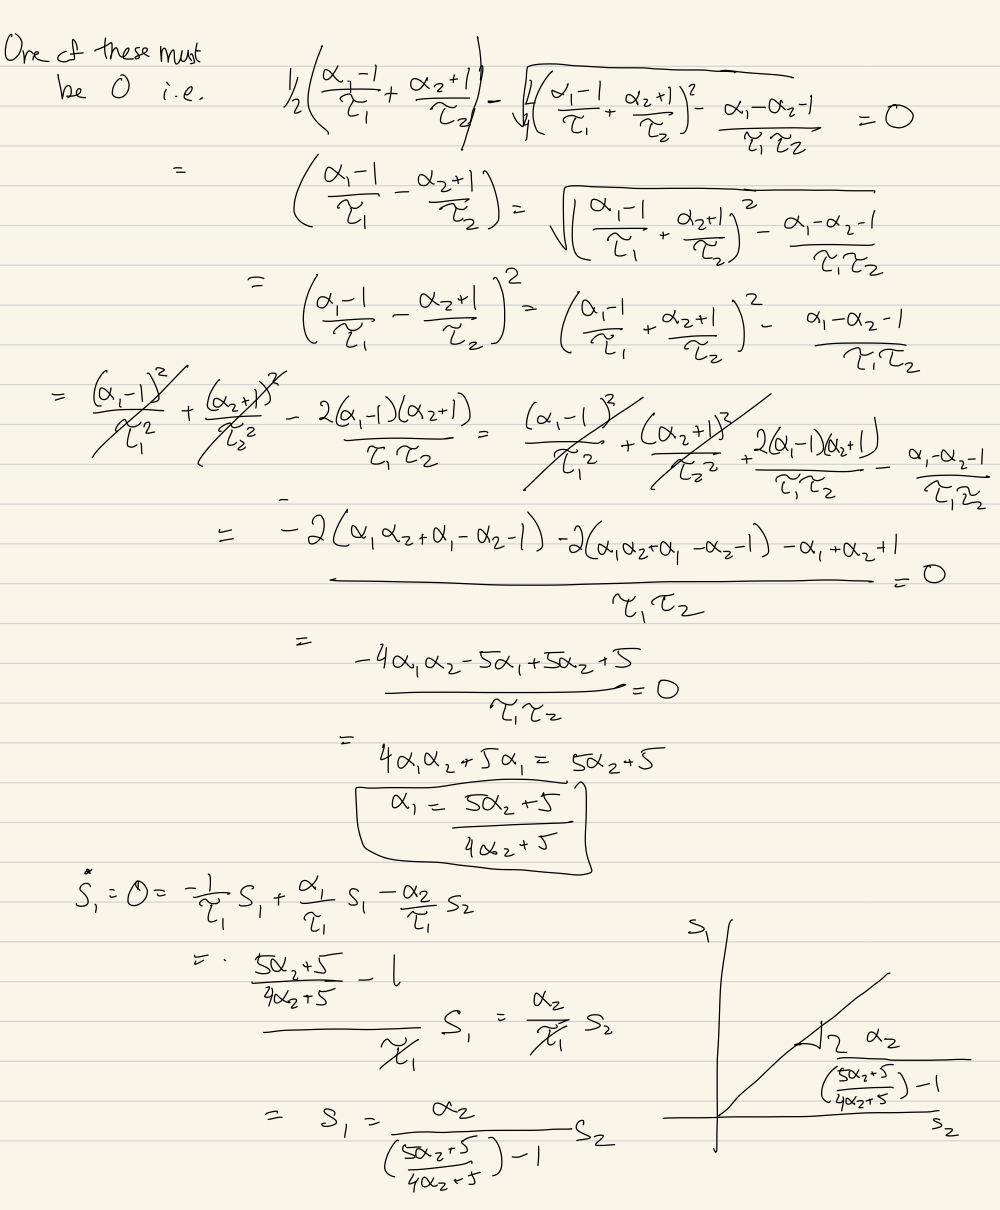

##3.6

[5 points, analytical]  


If $s_1 = s_2$, find under what  condition for the continuum of fixed points are attractive.

Hint: To be attractive, what should be true about the non-zero real parts of the eiganvalues? Since this is a real matrix, what does the trace of the matrix tell us about the eigenvalues?





---


ANSWER:

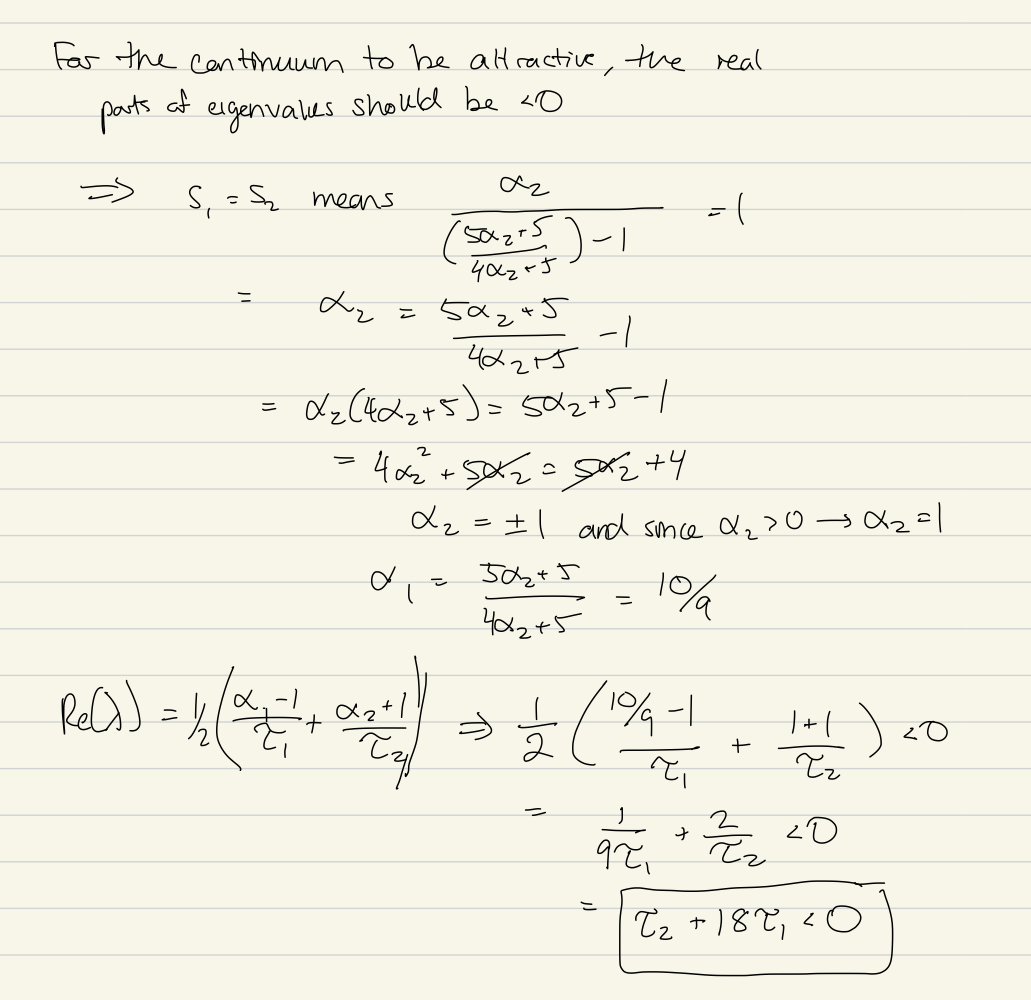
---





---



---



---



---





---
# Hint for 1.4

The following is a problem from 9.40 with solution. It is given here to help you with question 1.4.


---





---

Obtain the post-synaptic voltage response to a spike train (top graph) by convolving a spike train with the postsynaptic response to a single presynaptic spike. This assumes that postsynaptic potentials superimpose linearly.



<center><img src="https://drive.google.com/uc?export=view&id=1NC7Fya-2l6NrK6me9G2-i9j0P0lIYrNj" width="400"></center>



The following kernel in units of millivolt gives the post-synaptic voltage response of a cell to single spike:    $K(t) = e^{-t/\tau}$ where $\tau=10 \, msec$.  This cell receives a burst of three presynaptic spikes with a firing rate of $200 \, Hz$



1. Plot the presynaptic spike train and carefully label the inter-spike interval for the 1 spike case, two spikes case, and three spike cases. Make sure you understand why all these three cases are independent. The x-axis scale is in seconds.




---

The firing rate of spikes is $ f = 200 Hz$. Therefore, every $1/f$ seconds there is one spike. So 	$\Delta t_s = 1/200Hz = 0.005 sec = 5 msec$ is the interval between spikes.                     
	
Assume, amplitude of voltage is $v_s = 1$ in arbitrary units. Then right after
first spike V jumps to 1, then to $1e^{-5/10} + 1 = 1.6$ after second spike. After third spike V jupms to $1.6e^{-0.5} + 1 = 1.96$.
	
see the solution below using the convolution explicitly.


---





2. Qualitatively plot the post-synaptic response to this presynaptic spike train.

Bottom graph



---


**A formal solution:**


$$K(t) = v_s e^{-t/\tau}$$
	
output signal:
$$y(t) = \int K(t-t') x(t') dt'$$
	
train of spikes:
$$x(t') = \sum_s \delta(t-t_s)$$   
	
If firing rate $f$ Hz, then spikes are $T = 1/f$ seconds apart, and the linear response to $n$ spikes is
	
$$y(t) = \sum_n \int v_s e^{-(t-t')/\tau} \delta (t'-n T) dt'$$
	
After first spike at $t=0$,
	
$$y(t) = \int v_s e^{-(t-t')/\tau} \delta(t') dt' = v_s e^{-t/\tau}$$
	
After second spike:
\begin{align*}
y(t)  & = \int v_s e^{-(t-t')/\tau} \left\{ \delta(t') + \delta(t'-T)  \right\}\delta(t') dt' \\
& = v_s e^{-t/\tau} + v_s e^{-t/\tau} e^{T/\tau}
\end{align*}
	 
similarly after 3 spikes, we have
\begin{align*}
y(t) = v_s e^{-t/\tau} + v_s e^{-t/tau} e^{T/\tau} + v_s e^{-t/\tau} e^{2T?\tau}.
\end{align*}
 
Therefore after the 3rd spike, the response is:
\begin{align*}
y(t=2T)  & = v_s e^{-2T/\tau} + v_s e^{-2T/tau} e^{T/\tau} + v_s e^{-2T/\tau} e^{2T\tau} \\
y(2T )   & =  v_s e^{-2T/\tau} + v_s e^{-T/tau} + V \\
y(2T)   & = v_s(1 +  e^{-T/\tau} +  e^{-2T/\tau})
\end{align*}

If you replace $T = 1/200 Hz = 5 msec$  and $\tau = 10 msec$, you'll get the maximum amplitude of the signal right after the third spike. 


	



---



